# Ames housing project

*Regression and Classification with the Ames Housing Data*


Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 1. Estimating the value of homes from fixed characteristics.

Steps:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.

Build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components


2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.


3. Evaluate the mean dollar value of different renovations.

### Import packages

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime as dt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# I. EDA

In [2]:
# Load the data and get a look at the first 5 rows
df_house = pd.read_csv('housing.csv')
df_house.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Get the overall dimensions of the dataframe
df_house.shape

(1460, 81)

In [4]:
# Get info on all the columns of the dataframe
df_house.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Get some stats on the dataframe
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [6]:
# Check columns datatype and see the non-numerical columns
# Start with the non-numerical columns for data cleanup
df_house.columns[df_house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
# Check each of the columns and get an idea for the sample values for each
df_house[df_house.columns[df_house.isnull().any()].tolist()].sample(10)

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
198          92.0   NaN       None         0.0       TA       TA           No   
892          70.0   NaN       None         0.0       TA       TA           No   
54           60.0   NaN       None         0.0       TA       TA           No   
1343         57.0   NaN       None         0.0       TA       TA           No   
1052        100.0   NaN     BrkCmn       272.0       TA       TA           No   
851           NaN   NaN    BrkFace        40.0       Gd       TA           Gd   
510          75.0   NaN     BrkCmn        70.0       TA       TA           No   
1165         79.0   NaN      Stone       268.0       Gd       TA           No   
541           NaN   NaN    BrkFace        72.0       Gd       TA           No   
692          42.0   NaN    BrkFace       293.0       Gd       TA           Gd   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
198           Unf          Unf      SBrkr         NaN        NaN          NaN   
892           GLQ          Unf      SBrkr         NaN     Attchd       1963.0   
54            ALQ          Unf      SBrkr          TA     Detchd       1962.0   
1343          Unf          Unf      SBrkr          TA     Detchd       1929.0   
1052          Rec          Unf      SBrkr          TA     Attchd       1964.0   
851           Unf          Unf      SBrkr          TA     Attchd       2003.0   
510           BLQ          Rec      SBrkr          TA    CarPort       1951.0   
1165          Unf          Unf      SBrkr         NaN     Attchd       2009.0   
541           Unf          Unf      SBrkr          TA    BuiltIn       2000.0   
692           GLQ          Unf      SBrkr          Gd     Attchd       1989.0   

     GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature  
198           NaN        NaN        NaN    NaN  MnPrv         NaN  
892           RFn         TA         TA    NaN  MnPrv         NaN  
54            Unf         TA         TA    NaN  MnPrv         NaN  
1343          Unf         Fa         Fa    NaN    NaN         NaN  
1052          RFn         TA         TA    NaN  GdPrv         NaN  
851           Fin         TA         TA    NaN    NaN         NaN  
510           Unf         TA         TA    NaN    NaN        Shed  
1165          RFn         TA         TA    NaN    NaN         NaN  
541           Fin         TA         TA    NaN    NaN         NaN  
692           RFn         TA         TA    NaN    NaN         NaN

In [8]:
# Create a list of default values for all columns with NaN
# For LotFrontage, use the median value of the dataset
IMPUTE_COLUMNS = df_house.columns[df_house.isnull().any()].tolist()
IMPUTE_VALUES = [df_house['LotFrontage'].median(),'NA','None',0,'NA','NA','NA','NA','NA','SBrkr','NA','NA',0,'NA','NA','NA','NA','NA','NA']

In [9]:
# Impute the default values on columns with NaN values
for key, value in dict(zip(IMPUTE_COLUMNS,IMPUTE_VALUES)).items():
    df_house[key].fillna(value, inplace=True)

In [10]:
# Re-check again
df_house.columns[df_house.isnull().any()]

Index([], dtype='object')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


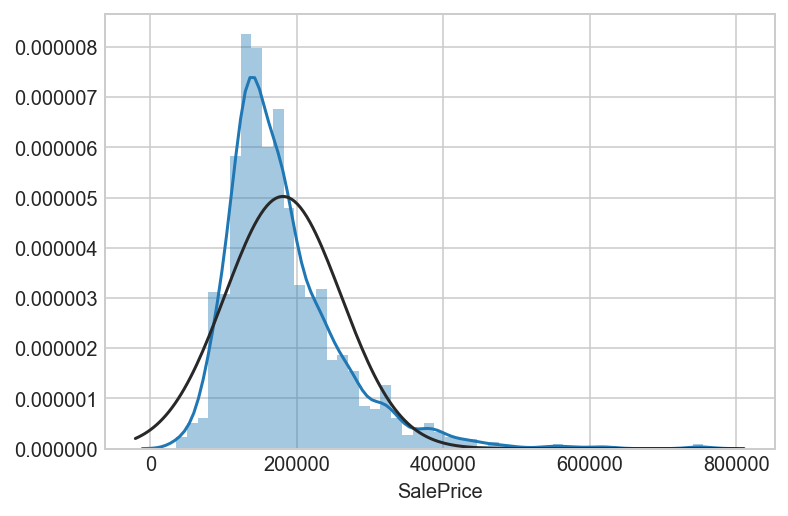

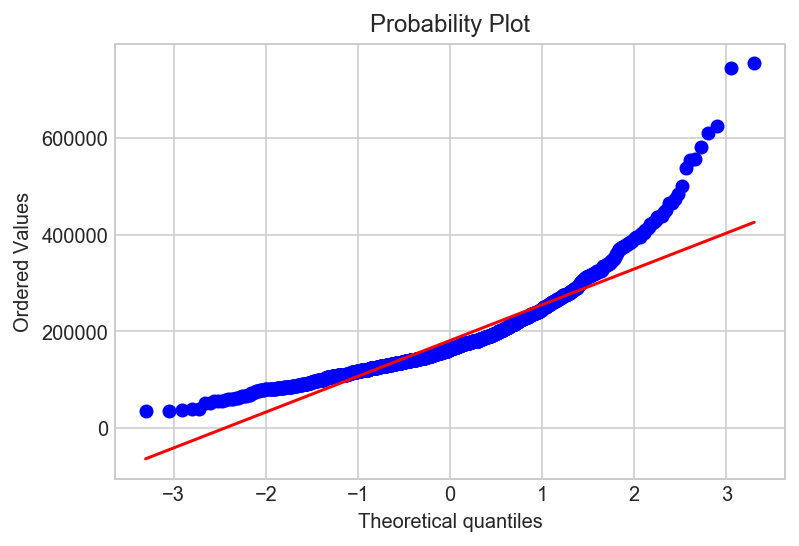

In [11]:
# Do some visualizations, (INITIAL VIEW and ASSUMPTIONS)

# Check the distribution of the Target Variable: SalePrice
from scipy.stats import norm
sns.distplot(df_house['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_house['SalePrice'], plot=plt)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


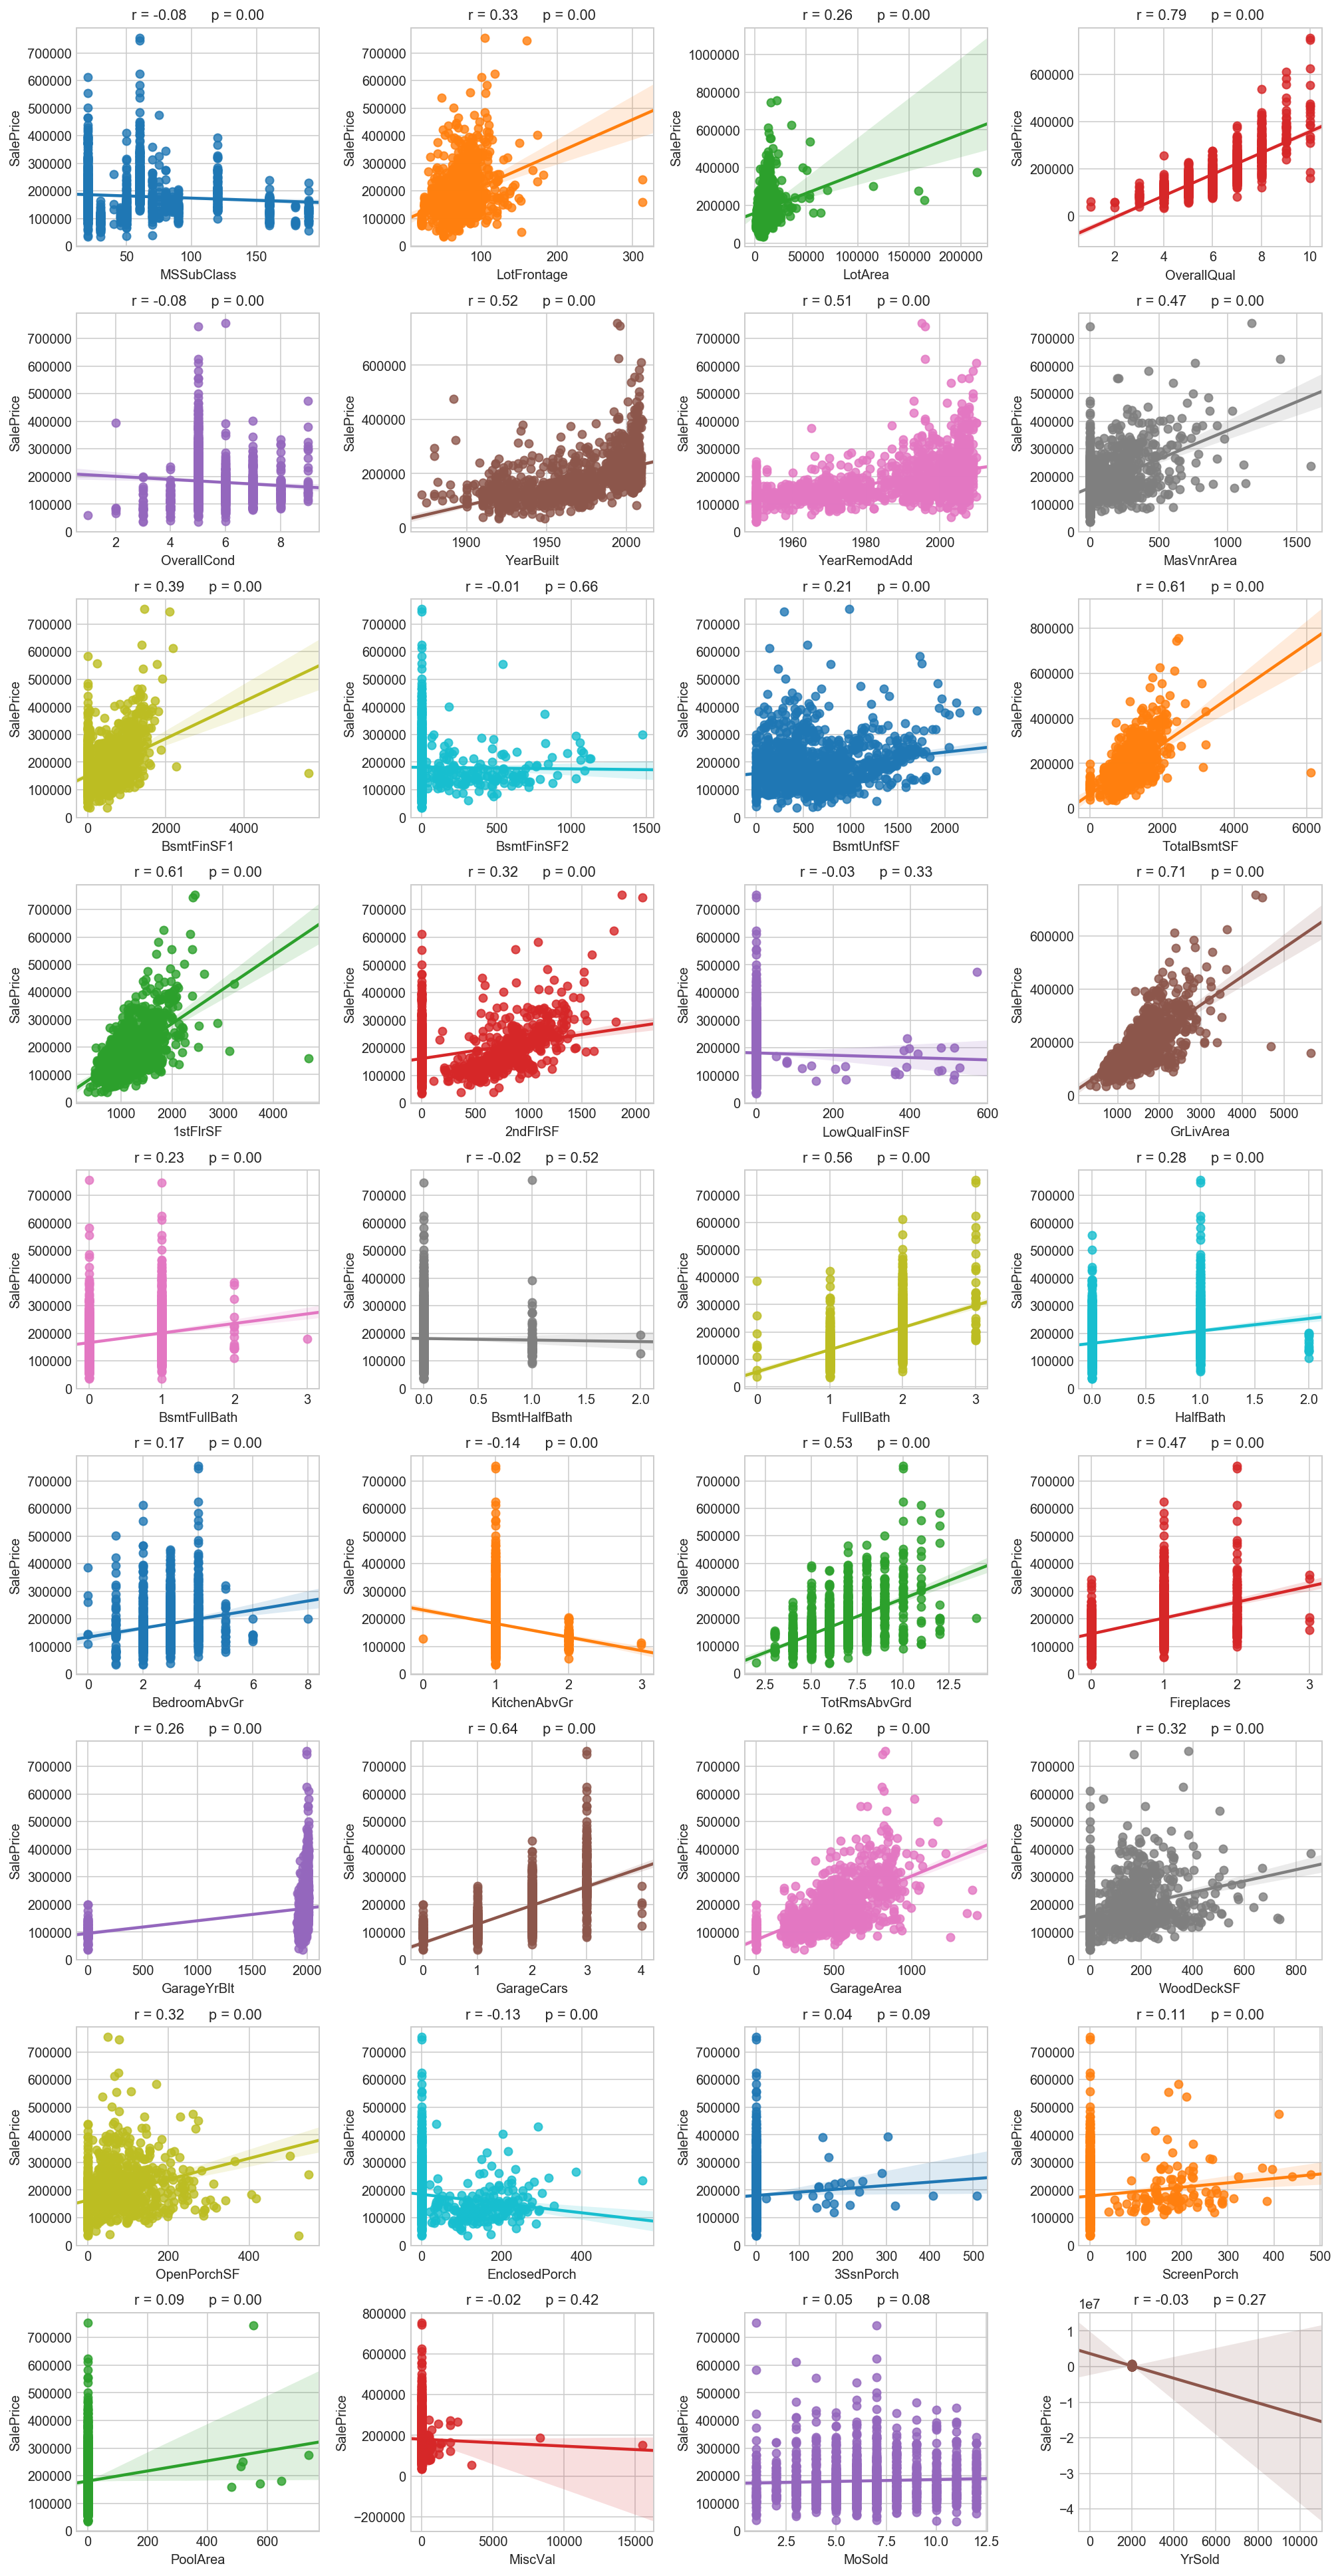

In [12]:
# Plot the correlations and p of numerical values vs SalePrice
numerical_feats = df_house.dtypes[df_house.dtypes != "object"].index

nr_rows = 9
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_house[li_plot_num_feats[i]], df_house['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(df_house[li_plot_num_feats[i]], df_house['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


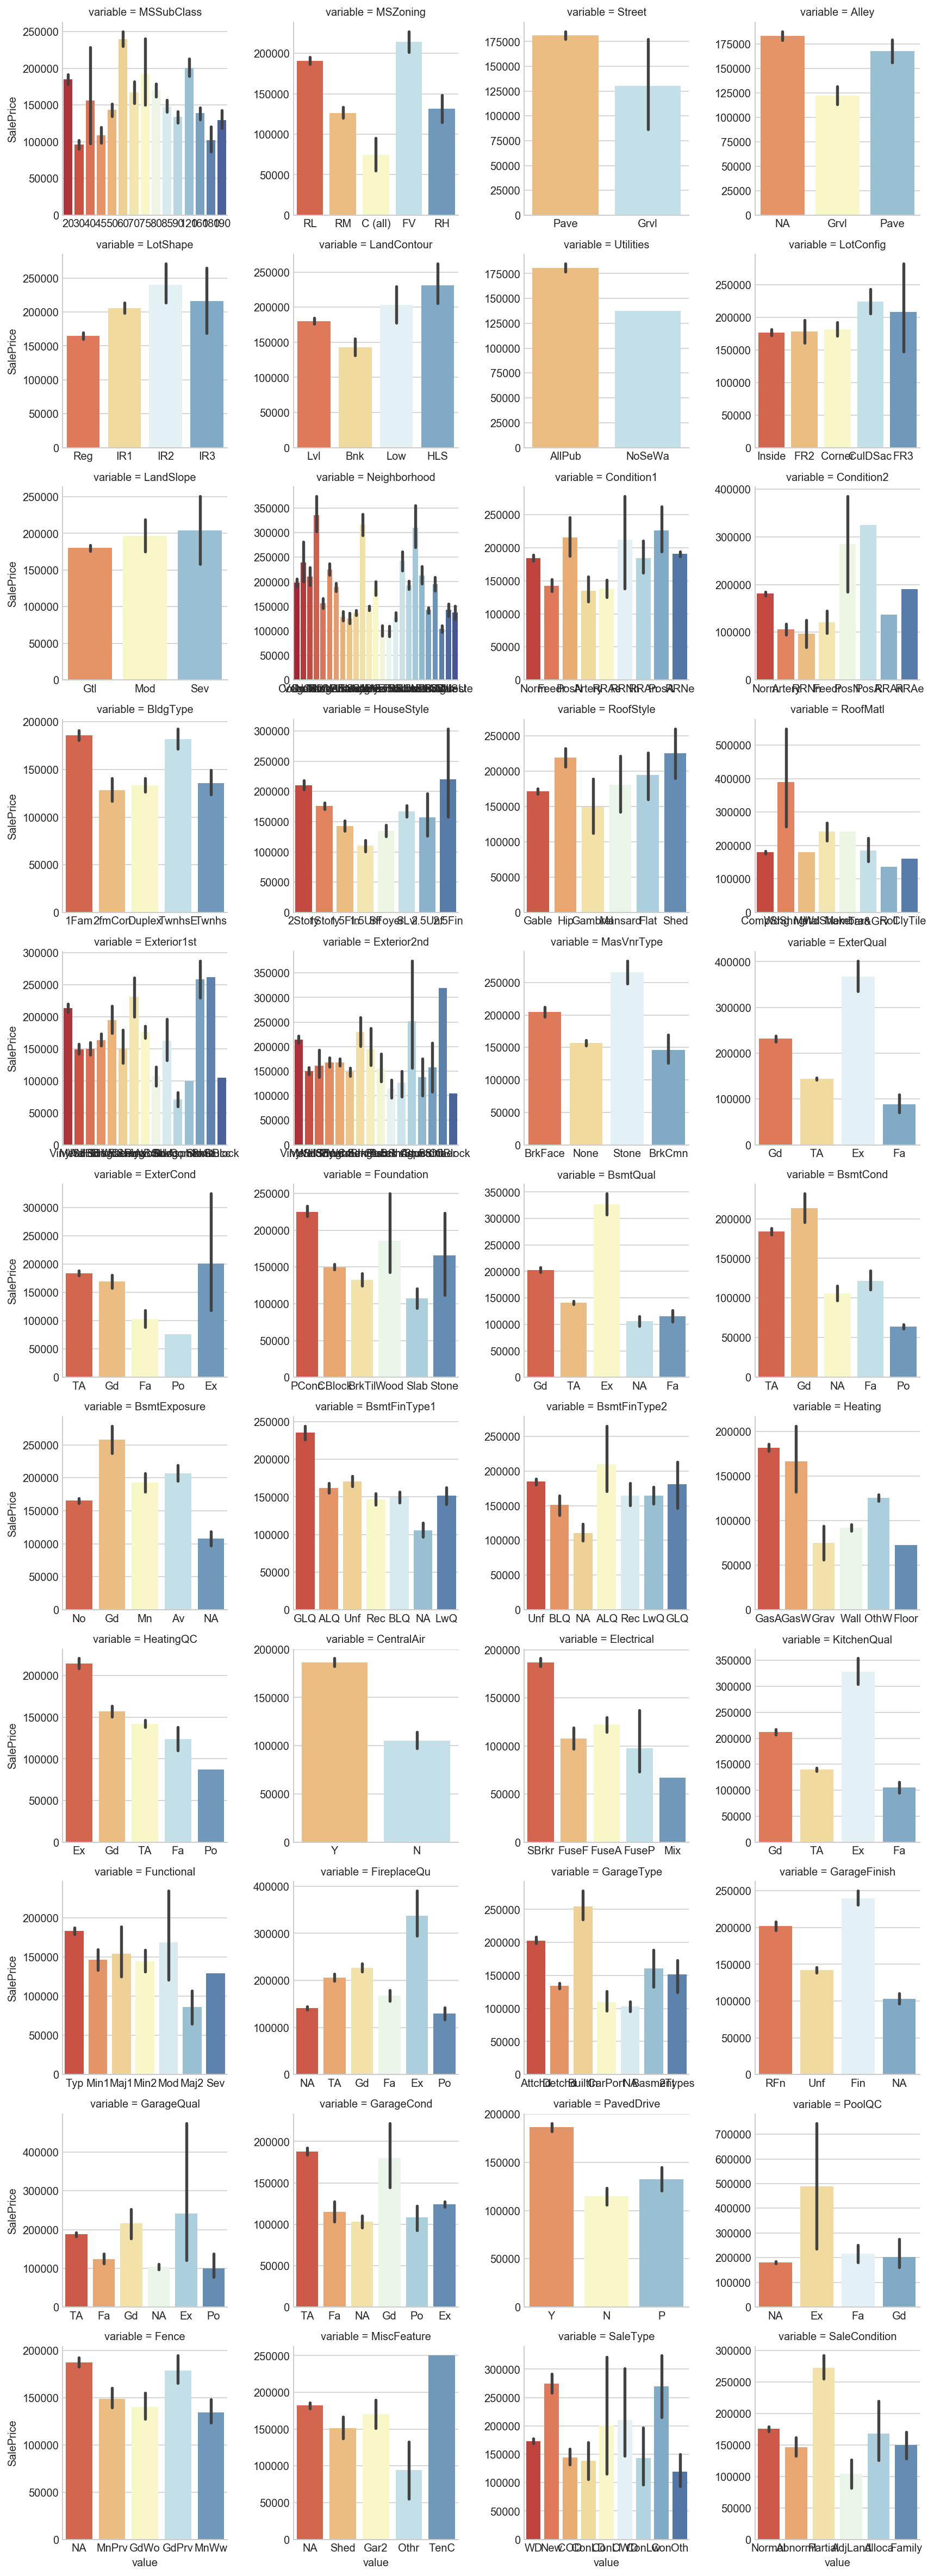

In [13]:
# Plot Categorical Values vs SalePrice
quant_features = df_house.select_dtypes(exclude='object').drop('MSSubClass',axis=1)
cat_features = df_house[df_house.columns[~df_house.columns.isin(quant_features.columns)]]

cat_plot = pd.melt(cat_features.join(df_house['SalePrice']),id_vars='SalePrice')
g = sns.FacetGrid(cat_plot, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.barplot, 'value','SalePrice', palette='RdYlBu')

# II. FEATURE ENGINEERING FOR M1 & M2 AND MODELS

In [14]:
# Filter out all the non-residential records
# MSZoning: Identifies the general zoning classification of the sale.
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density
df_house_res = df_house[df_house['MSZoning'].isin(['FV', 'RH', 'RL', 'RP', 'RM'])]

In [15]:
# Group the related features together before visualization
F_FIXED = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities',
           'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','YearBuilt',
           'YearRemodAdd', 'Foundation','TotalBsmtSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']
F_NFXED = ['OverallQual', 'OverallCond', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea',
           'ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
           'HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
           'GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
           'PoolArea','PoolQC','Fence','MiscFeature','MiscVal']
F_SALES = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

In [16]:
# Sale Conditions are excluded for both DataFrames of Model 1 and 2
# Create DataFrame for Model 1 (Fixed + Target Variable)
df_house_m1 = df_house_res[F_FIXED + ['SalePrice', 'YrSold']]
df_house_m1.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1102          20       RL         70.0     7000   Pave    NA      Reg   
303           20       RL         70.0     9800   Pave    NA      Reg   
1032          60       RL         69.0    14541   Pave    NA      IR1   
590           60       RL         64.0     8320   Pave    NA      Reg   
1185          50       RL         60.0     9738   Pave    NA      Reg   

     LandContour Utilities LotConfig   ...   FullBath HalfBath KitchenAbvGr  \
1102         Lvl    AllPub    Inside   ...          1        0            1   
303          Lvl    AllPub    Corner   ...          1        0            1   
1032         Lvl    AllPub    Corner   ...          2        1            1   
590          Lvl    AllPub    Inside   ...          2        1            1   
1185         Lvl    AllPub    Inside   ...          1        0            1   

     TotRmsAbvGrd Fireplaces GarageYrBlt  GarageCars  GarageArea SalePrice  \
1102            6          0      1960.0           1         254    135000   
303             5          0      1975.0           2         552    149900   
1032           10          1      1993.0           3         796    310000   
590             6          0      2004.0           2         520    185900   
1185            7          0      1965.0           1         392    104900   

      YrSold  
1102    2007  
303     2006  
1032    2006  
590     2008  
1185    2006  

[5 rows x 33 columns]

In [17]:
# Create DataFrame for Model 2 (Fixed + Non-Fixed + Target Variable)
df_house_m2 = df_house_res[F_FIXED + F_NFXED+ ['SalePrice', 'SaleCondition', 'YrSold']]
df_house_m2.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
274           20       RL         76.0     8314   Pave    NA      Reg   
437           45       RM         50.0     6000   Pave    NA      Reg   
72            60       RL         74.0    10141   Pave    NA      IR1   
1389          50       RM         60.0     6000   Pave    NA      Reg   
845           85       RL         69.0    16647   Pave    NA      IR1   

     LandContour Utilities LotConfig   ...   3SsnPorch ScreenPorch PoolArea  \
274          Lvl    AllPub    Corner   ...           0           0        0   
437          Lvl    AllPub    Inside   ...           0           0        0   
72           Lvl    AllPub    Corner   ...           0         291        0   
1389         Lvl    AllPub    Inside   ...           0           0        0   
845          Lvl    AllPub   CulDSac   ...           0           0        0   

     PoolQC Fence MiscFeature  MiscVal  SalePrice SaleCondition  YrSold  
274      NA    NA          NA        0     124500        Normal    2007  
437      NA    NA          NA        0     119000        Normal    2009  
72       NA    NA          NA        0     185000        Normal    2009  
1389     NA    NA          NA        0     131000        Normal    2007  
845      NA    NA          NA        0     171000        Normal    2007  

[5 rows x 71 columns]

In [18]:
# Feature Engineering - Calculate Age of the Building
# df_house_m1['Age'] = df_house_m1['YrSold'] - df_house_m1['YearBuilt']
# df_house_m2['Age'] = df_house_m1['YrSold'] - df_house_m2['YearBuilt']
df_house_m1.insert(len(df_house_m1.columns), 'Age', df_house_m1['YrSold'] - df_house_m1['YearBuilt'])
df_house_m2.insert(len(df_house_m2.columns), 'Age', df_house_m2['YrSold'] - df_house_m2['YearBuilt'])

In [19]:
# Feature Engineering - Remodeled Flag (Y/N)
# df_house_m1['Remodel'] = np.where(df_house_m1['YearBuilt'] == df_house_m1['YearRemodAdd'], 0, 1)
# df_house_m2['Remodel'] = np.where(df_house_m2['YearBuilt'] == df_house_m2['YearRemodAdd'], 0, 1)
df_house_m1.insert(len(df_house_m1.columns), 'Remodel', np.where(df_house_m1['YearBuilt'] == df_house_m1['YearRemodAdd'], 0, 1))
df_house_m2.insert(len(df_house_m2.columns), 'Remodel', np.where(df_house_m2['YearBuilt'] == df_house_m2['YearRemodAdd'], 0, 1))

In [20]:
# Feature Engineering - Calculate Age of the Garage
# df_house_m1['AgeGarage'] = np.where(df_house_m1['GarageYrBlt'] == 0, 0, dt.date.today().year - df_house_m1['GarageYrBlt'])
# df_house_m2['AgeGarage'] = np.where(df_house_m2['GarageYrBlt'] == 0, 0, dt.date.today().year - df_house_m2['GarageYrBlt'])
df_house_m1.insert(len(df_house_m1.columns), 'AgeGarage', np.where(df_house_m1['GarageYrBlt'] == 0, 0, dt.date.today().year - df_house_m1['GarageYrBlt']))
df_house_m2.insert(len(df_house_m2.columns), 'AgeGarage', np.where(df_house_m2['GarageYrBlt'] == 0, 0, dt.date.today().year - df_house_m2['GarageYrBlt']))

In [21]:
# Drop the Old Columns
df_house_m1 = df_house_m1.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])
df_house_m2 = df_house_m2.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])

In [22]:
# Get Dummy Variables except Condition 2
# Get the Dummy Variables for all except Condition 1 and 2 since these 2 columns have overlapping values 
df_house_m1 = pd.get_dummies(data=df_house_m1, columns=['MSSubClass','MSZoning','Street', 'Alley','LotShape',
                                                        'LandContour','Utilities','LotConfig','LandSlope',
                                                        'Neighborhood','Condition1','BldgType','HouseStyle',
                                                        'Foundation'], drop_first=True)

df_house_m2 = pd.get_dummies(data=df_house_m2, columns=['MSSubClass','MSZoning','Street', 'Alley','LotShape',
                                                        'LandContour','Utilities','LotConfig','LandSlope',
                                                        'Neighborhood','Condition1','BldgType','HouseStyle',
                                                        'RoofStyle','RoofMatl', 'Exterior1st', 'MasVnrType', 
                                                        'Foundation','Heating','Electrical','GarageType', 'MiscFeature'],
                             drop_first=True)

In [23]:
#Iterate through Condition2 and map to the dummy variables of Condition1 except Artery which has been dropped
for index, row in df_house_m1.iterrows():
    if row['Condition2'] == 'Feedr':
        df_house_m1.at[index, 'Condition1_Feedr'] = 1
    elif row['Condition2'] == 'Norm':
        df_house_m1.at[index, 'Condition1_Norm'] = 1
    elif row['Condition2'] == 'PosA':
        df_house_m1.at[index, 'Condition1_PosA'] = 1
    elif row['Condition2'] == 'PosN':
        df_house_m1.at[index, 'Condition1_PosN'] = 1
    elif row['Condition2'] == 'RRAe':
        df_house_m1.at[index, 'Condition1_RRAe'] = 1
    elif row['Condition2'] == 'RRAn':
        df_house_m1.at[index, 'Condition1_RRAn'] = 1
    elif row['Condition2'] == 'RRNe':
        df_house_m1.at[index, 'Condition1_RRNe'] = 1
    elif row['Condition2'] == 'RRNn':
        df_house_m1.at[index, 'Condition1_RRNn'] = 1
        
for index, row in df_house_m2.iterrows():
    if row['Condition2'] == 'Feedr':
        df_house_m2.at[index, 'Condition1_Feedr'] = 1
    elif row['Condition2'] == 'Norm':
        df_house_m2.at[index, 'Condition1_Norm'] = 1
    elif row['Condition2'] == 'PosA':
        df_house_m2.at[index, 'Condition1_PosA'] = 1
    elif row['Condition2'] == 'PosN':
        df_house_m2.at[index, 'Condition1_PosN'] = 1
    elif row['Condition2'] == 'RRAe':
        df_house_m2.at[index, 'Condition1_RRAe'] = 1
    elif row['Condition2'] == 'RRAn':
        df_house_m2.at[index, 'Condition1_RRAn'] = 1
    elif row['Condition2'] == 'RRNe':
        df_house_m2.at[index, 'Condition1_RRNe'] = 1
    elif row['Condition2'] == 'RRNn':
        df_house_m2.at[index, 'Condition1_RRNn'] = 1

In [24]:
# Drop the Condition2 columns
df_house_m1 = df_house_m1.drop(columns=['Condition2'])
df_house_m2 = df_house_m2.drop(columns=['Condition2'])

In [25]:
# Add additional dummy column with default 0 value
df_house_m2['Exterior1st_Other'] = 0

# Iterate through Exterior2nd and map to the dummy variables of Exterior1st except AsbShng which has been dropped
for index, row in df_house_m2.iterrows():
    if row['Exterior2nd'] == 'AsphShn':
        df_house_m2.at[index, 'Exterior1st_AsphShn'] = 1
    elif row['Exterior2nd'] == 'BrkComm':
        df_house_m2.at[index, 'Exterior1st_BrkComm'] = 1
    elif row['Exterior2nd'] == 'BrkFace':
        df_house_m2.at[index, 'Exterior1st_BrkFace'] = 1
    elif row['Exterior2nd'] == 'CBlock':
        df_house_m2.at[index, 'Exterior1st_CBlock'] = 1
    elif row['Exterior2nd'] == 'CemntBd':
        df_house_m2.at[index, 'Exterior1st_CemntBd'] = 1
    elif row['Exterior2nd'] == 'HdBoard':
        df_house_m2.at[index, 'Exterior1st_HdBoard'] = 1
    elif row['Exterior2nd'] == 'ImStucc':
        df_house_m2.at[index, 'Exterior1st_ImStucc'] = 1
    elif row['Exterior2nd'] == 'MetalSd':
        df_house_m2.at[index, 'Exterior1st_MetalSd'] = 1
    elif row['Exterior2nd'] == 'Other':
        df_house_m2.at[index, 'Exterior1st_Other'] = 1
    elif row['Exterior2nd'] == 'Plywood':
        df_house_m2.at[index, 'Exterior1st_Plywood'] = 1
    elif row['Exterior2nd'] == 'PreCast':
        df_house_m2.at[index, 'Exterior1st_PreCast'] = 1
    elif row['Exterior2nd'] == 'Stone':
        df_house_m2.at[index, 'Exterior1st_Stone'] = 1
    elif row['Exterior2nd'] == 'Stucco':
        df_house_m2.at[index, 'Exterior1st_Stucco'] = 1
    elif row['Exterior2nd'] == 'VinylSd':
        df_house_m2.at[index, 'Exterior1st_VinylSd'] = 1
    elif row['Exterior2nd'] == 'Wd Sdng':
        df_house_m2.at[index, 'Exterior1st_Wd Sdng'] = 1
    elif row['Exterior2nd'] == 'WdShing':
        df_house_m2.at[index, 'Exterior1st_WdShing'] = 1

# Drop the Exterior2nd Column after merge with Exterior1st
df_house_m2.drop(columns=['Exterior2nd'], inplace=True)

In [26]:
# Encode remaining features for df_house_m2
# This approach makes an assumption that there is linear correlation between the values
# Another approach is to encode them as dummy variables
dict_ExterQual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dict_ExterCond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dict_BsmtQual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
dict_BsmtCond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
dict_BsmtExposure = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
dict_BsmtFinType1 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
dict_BsmtFinType2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
dict_HeatingQC = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dict_CentralAir = {'Y':1, 'N':0}
dict_KitchenQual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dict_Functional = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}
dict_FireplaceQu = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
dict_GarageFinish = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
dict_GarageQual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
dict_GarageCond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
dict_PavedDrive = {'Y':2, 'P':1, 'N':0}
dict_PoolQC = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}
dict_Fence = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}

In [27]:
# Impute the encoded numerical ratings to the new columns
df_house_m2['ExterQual_e'] = df_house_m2['ExterQual'].apply(lambda x: dict_ExterQual[x])
df_house_m2['ExterCond_e'] = df_house_m2['ExterCond'].apply(lambda x: dict_ExterCond[x])
df_house_m2['BsmtQual_e'] = df_house_m2['BsmtQual'].apply(lambda x: dict_BsmtQual[x])
df_house_m2['BsmtCond_e'] = df_house_m2['BsmtCond'].apply(lambda x: dict_BsmtCond[x])
df_house_m2['BsmtExposure_e'] = df_house_m2['BsmtExposure'].apply(lambda x: dict_BsmtExposure[x])
df_house_m2['BsmtFinType1_e'] = df_house_m2['BsmtFinType1'].apply(lambda x: dict_BsmtFinType1[x])
df_house_m2['BsmtFinType2_e'] = df_house_m2['BsmtFinType2'].apply(lambda x: dict_BsmtFinType2[x])
df_house_m2['HeatingQC_e'] = df_house_m2['HeatingQC'].apply(lambda x: dict_HeatingQC[x])
df_house_m2['CentralAir_e'] = df_house_m2['CentralAir'].apply(lambda x: dict_CentralAir[x])
df_house_m2['KitchenQual_e'] = df_house_m2['KitchenQual'].apply(lambda x: dict_KitchenQual[x])
df_house_m2['Functional_e'] = df_house_m2['Functional'].apply(lambda x: dict_Functional[x])
df_house_m2['FireplaceQu_e'] = df_house_m2['FireplaceQu'].apply(lambda x: dict_FireplaceQu[x])
df_house_m2['GarageFinish_e'] = df_house_m2['GarageFinish'].apply(lambda x: dict_GarageFinish[x])
df_house_m2['GarageQual_e'] = df_house_m2['GarageQual'].apply(lambda x: dict_GarageQual[x])
df_house_m2['GarageCond_e'] = df_house_m2['GarageCond'].apply(lambda x: dict_GarageCond[x])
df_house_m2['PavedDrive_e'] = df_house_m2['PavedDrive'].apply(lambda x: dict_PavedDrive[x])
df_house_m2['PoolQC_e'] = df_house_m2['PoolQC'].apply(lambda x: dict_PoolQC[x])
df_house_m2['Fence_e'] = df_house_m2['Fence'].apply(lambda x: dict_Fence[x])

In [28]:
df_house_m2 = df_house_m2.drop(columns=['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                          'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
                          'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'])

In [29]:
# Check whether all values have been converted to numeric before proceeding to feature selection
df_house_m1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 99 columns):
LotFrontage             1450 non-null float64
LotArea                 1450 non-null int64
TotalBsmtSF             1450 non-null int64
GrLivArea               1450 non-null int64
BsmtFullBath            1450 non-null int64
BsmtHalfBath            1450 non-null int64
FullBath                1450 non-null int64
HalfBath                1450 non-null int64
KitchenAbvGr            1450 non-null int64
TotRmsAbvGrd            1450 non-null int64
Fireplaces              1450 non-null int64
GarageCars              1450 non-null int64
GarageArea              1450 non-null int64
SalePrice               1450 non-null int64
YrSold                  1450 non-null int64
Age                     1450 non-null int64
Remodel                 1450 non-null int64
AgeGarage               1450 non-null float64
MSSubClass_30           1450 non-null uint8
MSSubClass_40           1450 non-null uint8
MSSubClas

In [30]:
df_house_m2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 177 columns):
LotFrontage             float64
LotArea                 int64
TotalBsmtSF             int64
GrLivArea               int64
BsmtFullBath            int64
BsmtHalfBath            int64
FullBath                int64
HalfBath                int64
KitchenAbvGr            int64
TotRmsAbvGrd            int64
Fireplaces              int64
GarageCars              int64
GarageArea              int64
OverallQual             int64
OverallCond             int64
MasVnrArea              float64
WoodDeckSF              int64
OpenPorchSF             int64
EnclosedPorch           int64
3SsnPorch               int64
ScreenPorch             int64
PoolArea                int64
MiscVal                 int64
SalePrice               int64
SaleCondition           object
YrSold                  int64
Age                     int64
Remodel                 int64
AgeGarage               float64
MSSubClass_30  

## MODEL 1.1 - Feature Elimination using sklearn and statsmodel p-value

In [31]:
#Set-up Predictor and Target Matrices
cols = list(df_house_m1.columns.values)
cols.remove('SalePrice')
cols.remove('YrSold')

In [32]:
# Split the Train and Test data by Year Sold
X_Train = df_house_m1[df_house_m1['YrSold'] != 2010][cols]
y_Train = df_house_m1[df_house_m1['YrSold'] != 2010]['SalePrice'].values

X_Test = df_house_m1[df_house_m1['YrSold'] == 2010][cols]
y_Test = df_house_m1[df_house_m1['YrSold'] == 2010]['SalePrice'].values

In [33]:
# Perform Scaling first before doing MLR Model
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_Train = ss.fit_transform(X_Train)
X_Test = ss.fit_transform(X_Test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
# Convert the Scaled Values into DataFrame to preserve the column names during the model creation
X_Train = pd.DataFrame(data=X_Train, columns=cols)
X_Test = pd.DataFrame(data=X_Test, columns=cols)

In [35]:
#Build the MLR Model using sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model_sk = lm.fit(X_Train, y_Train)

In [36]:
model_sk.score(X_Train, y_Train), model_sk.score(X_Test, y_Test)

(0.8325640627324609, 0.8425037640706121)

In [37]:
# Check the p-values of the features using statsmodel
X_Train = sm.add_constant(X_Train)
model_sm = sm.OLS(y_Train, X_Train).fit() 

In [38]:
# Check the summary and the pvalues of the features
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     61.17
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -15085.
No. Observations:                1278   AIC:                         3.036e+04
Df Residuals:                    1181   BIC:                         3.086e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.82e+05    941.411    193.316      0.000     1.8e+05    1.84e+05
LotFrontage          -2689.6322   1364.073     -1.972      0.049   -5365.909     -13.356
LotArea               5789.6867   1477.921      3.917      0.000    2890.043    8689.331
TotalBsmtSF           3124.2071   2003.974      1.559      0.119    -807.540    7055.954
GrLivArea             3.617e+04   3005.447     12.035      0.000    3.03e+04    4.21e+04
BsmtFullBath          7113.7836   1140.993      6.235      0.000    4875.184    9352.384
BsmtHalfBath          2941.9489   1029.312      2.858      0.004     922.465    4961.433
FullBath              3631.2042   1763.309      2.059      0.040     171.637    7090.771
HalfBath              4144.3655   1554.013      2.667      0.008    1095.431    7193.300
KitchenAbvGr         -7020.5043   1799.065     -3.902      0.000   -1.06e+04   -3490.785
TotRmsAbvGrd           812.5861   2050.023      0.396      0.692   -3209.507    4834.680
Fireplaces            4986.9554   1239.457      4.024      0.000    2555.173    7418.738
GarageCars            1.111e+04   2390.823      4.647      0.000    6418.801    1.58e+04
GarageArea           -2234.0424   2322.341     -0.962      0.336   -6790.417    2322.333
Age                  -1.095e+04   3207.827     -3.413      0.001   -1.72e+04   -4656.184
Remodel               2798.1261   1165.476      2.401      0.017     511.491    5084.761
AgeGarage            -3399.1253   1482.442     -2.293      0.022   -6307.638    -490.612
MSSubClass_30         -327.9659   1449.377     -0.226      0.821   -3171.607    2515.675
MSSubClass_40         -146.1187    996.419     -0.147      0.883   -2101.068    1808.831
MSSubClass_45        -1424.9029   2696.254     -0.528      0.597   -6714.886    3865.080
MSSubClass_50        -2043.9774   3828.009     -0.534      0.593   -9554.433    5466.479
MSSubClass_60        -7617.2981   4576.827     -1.664      0.096   -1.66e+04    1362.321
MSSubClass_70         -944.4639   2415.247     -0.391      0.696   -5683.117    3794.189
MSSubClass_75        -1907.1240   2437.971     -0.782      0.434   -6690.362    2876.114
MSSubClass_80        -3081.1986   3571.158     -0.863      0.388   -1.01e+04    3925.323
MSSubClass_85        -1106.6983   1760.986     -0.628      0.530   -4561.709    2348.312
MSSubClass_90        -1018.6854    914.811     -1.114      0.266   -2813.522     776.151
MSSubClass_120       -8317.0955   4972.429     -1.673      0.095   -1.81e+04    1438.684
MSSubClass_160       -1.181e+04   5087.314     -2.321      0.020   -2.18e+04   -1826.809
MSSubClass_180       -2508.6130   2363.570     -1.061      0.289   -7145.877    2128.651
MSSubClass_190        1153.1539   5019.476      0.230      0.818   -8694.930     1.1e+04
MSZoning_RH           -951.0275   1490.772     -0.638    

In [39]:
# Get list of p_values and remove the first one which corresponds to the intercept (const)
p_values = list(model_sm.pvalues)
p_values.pop(0)

# Build DataFrame using the p_values and column names as the index
df_features_p = pd.DataFrame(data=p_values, columns=['p_value'], index=cols)

In [40]:
# Only keep p_values <= 0.05
df_features_p = df_features_p[df_features_p['p_value'] <= 0.05]

In [41]:
# Split the Train and Test data by Year Sold again using the reduced features
X_Train = df_house_m1[df_house_m1['YrSold'] != 2010][df_features_p.index.T]
y_Train = df_house_m1[df_house_m1['YrSold'] != 2010]['SalePrice'].values

X_Test = df_house_m1[df_house_m1['YrSold'] == 2010][df_features_p.index.T]
y_Test = df_house_m1[df_house_m1['YrSold'] == 2010]['SalePrice'].values

In [42]:
# Perform Scaling first before doing MLR Model
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_Train = ss.fit_transform(X_Train)
X_Test = ss.fit_transform(X_Test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
# Convert the Scaled Values into DataFrame to preserve the column names during the model creation
X_Train = pd.DataFrame(data=X_Train, columns=df_features_p.index.T)
X_Test = pd.DataFrame(data=X_Test, columns=df_features_p.index.T)

In [44]:
# Check the p-values of the features using statsmodel
X_Train = sm.add_constant(X_Train)
model_sm = sm.OLS(y_Train, X_Train).fit() 

In [45]:
# Check the new summary
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     180.3
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -15193.
No. Observations:                1278   AIC:                         3.044e+04
Df Residuals:                    1249   BIC:                         3.059e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.82e+05    996.252    182.674      0.000     1.8e+05    1.84e+05
LotFrontage            205.7024   1249.993      0.165      0.869   -2246.615    2658.020
LotArea               7191.9837   1383.851      5.197      0.000    4477.054    9906.913
GrLivArea             3.368e+04   1888.642     17.831      0.000       3e+04    3.74e+04
BsmtFullBath          7121.3118   1097.462      6.489      0.000    4968.240    9274.383
BsmtHalfBath          2273.9519   1032.016      2.203      0.028     249.276    4298.628
FullBath              3322.3650   1680.529      1.977      0.048      25.394    6619.336
HalfBath              -266.1313   1296.663     -0.205      0.837   -2810.010    2277.747
KitchenAbvGr         -8060.8347   1085.139     -7.428      0.000   -1.02e+04   -5931.938
Fireplaces            6279.9407   1211.150      5.185      0.000    3903.827    8656.055
GarageCars            1.239e+04   1396.490      8.873      0.000    9651.750    1.51e+04
Age                  -1.586e+04   1900.192     -8.349      0.000   -1.96e+04   -1.21e+04
Remodel               4305.6120   1153.535      3.733      0.000    2042.531    6568.693
AgeGarage            -4669.8320   1425.965     -3.275      0.001   -7467.384   -1872.280
MSSubClass_160       -6524.0361   1139.633     -5.725      0.000   -8759.842   -4288.231
LotShape_IR3         -3282.6713   1062.040     -3.091      0.002   -5366.250   -1199.093
LandContour_HLS       4217.0697   1249.967      3.374      0.001    1764.804    6669.336
LandContour_Lvl       1769.1922   1303.359      1.357      0.175    -787.823    4326.207
LotConfig_CulDSac     3118.8395   1053.776      2.960      0.003    1051.473    5186.206
LandSlope_Sev        -3110.1170   1251.616     -2.485      0.013   -5565.619    -654.615
Neighborhood_Edwards -4733.9139   1042.046     -4.543      0.000   -6778.269   -2689.559
Neighborhood_Gilbert -5439.8878   1119.509     -4.859      0.000   -7636.214   -3243.561
Neighborhood_Mitchel -3520.4661   1033.908     -3.405      0.001   -5548.854   -1492.078
Neighborhood_NWAmes  -3634.2472   1061.934     -3.422      0.001   -5717.619   -1550.876
Neighborhood_NoRidge  7859.9335   1093.540      7.188      0.000    5714.555       1e+04
Neighborhood_NridgHt  1.374e+04   1121.509     12.250      0.000    1.15e+04    1.59e+04
Neighborhood_StoneBr  8008.5694   1038.057      7.715      0.000    5972.041       1e+04
Condition1_Feedr     -3511.0649   1023.241     -3.431      0.001   -5518.525   -1503.604
Condition1_RRAe      -2574.7157   1010.625     -2.548      0.011   -4557.425    -592.007
==============================================================================
Omnibus:                      323.536   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12029.07

## MODEL 1.2 - Feature Elimination using Lasso

In [46]:
# Split the Train and Test data by Year Sold
X_Train = df_house_m1[df_house_m1['YrSold'] != 2010][cols]
y_Train = df_house_m1[df_house_m1['YrSold'] != 2010]['SalePrice'].values

X_Test = df_house_m1[df_house_m1['YrSold'] == 2010][cols]
y_Test = df_house_m1[df_house_m1['YrSold'] == 2010]['SalePrice'].values

In [47]:
# Generate alphas
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0,0.5,'weights')

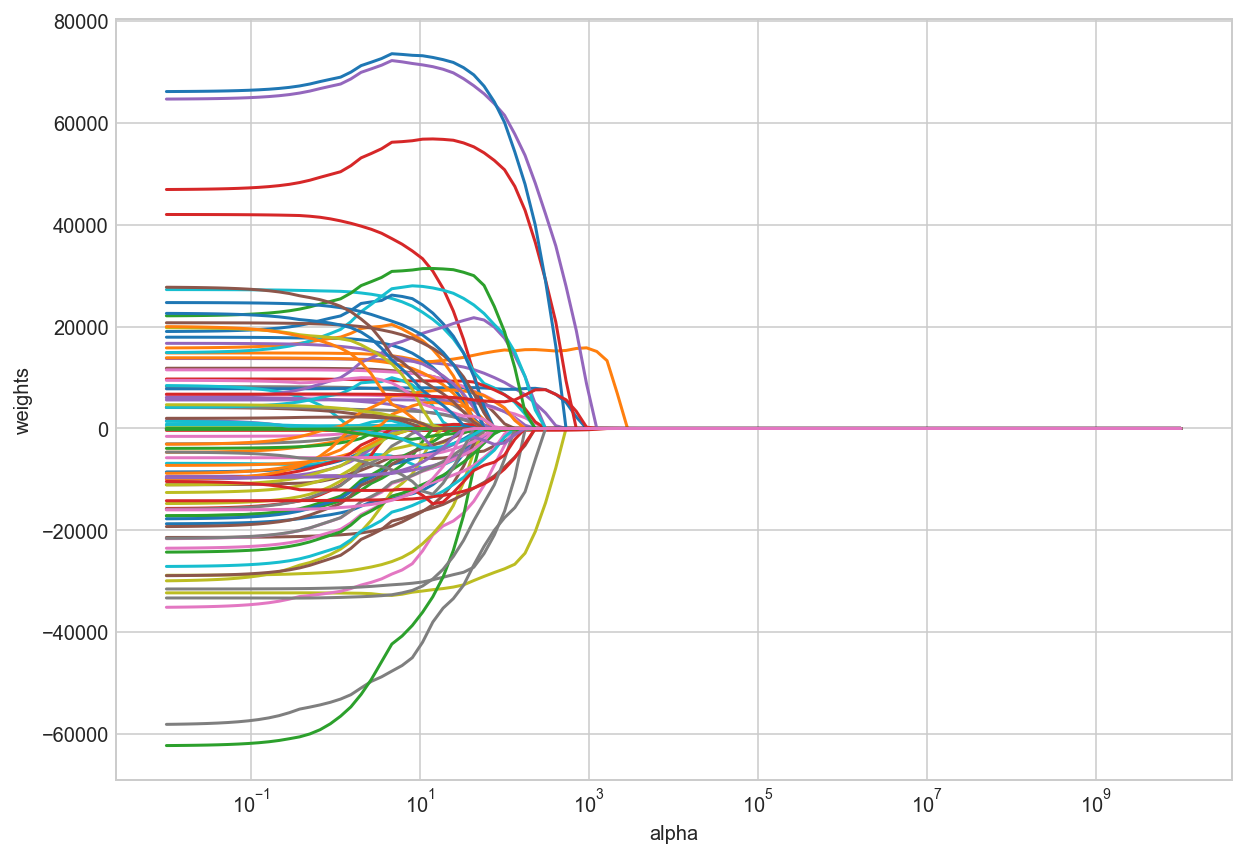

In [48]:
#Do Feature Selection using Lasso
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
lasso = Lasso(max_iter = 100000, normalize = True, fit_intercept=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_Train, y_Train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,7))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [49]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True, fit_intercept=True)
lassocv.fit(X_Train, y_Train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_Train, y_Train)
mean_squared_error(y_Train, lasso.predict(X_Train))

1092320450.8549538

In [50]:
lasso.score(X_Train, y_Train), lasso.score(X_Test, y_Test)

(0.8252610707753196, 0.8412298098366121)

In [51]:
# Some of the coefficients are now reduced to exactly zero.
model1_coefs_df = pd.DataFrame(data=lasso.coef_, index=cols, columns=['M1Coeffs'])

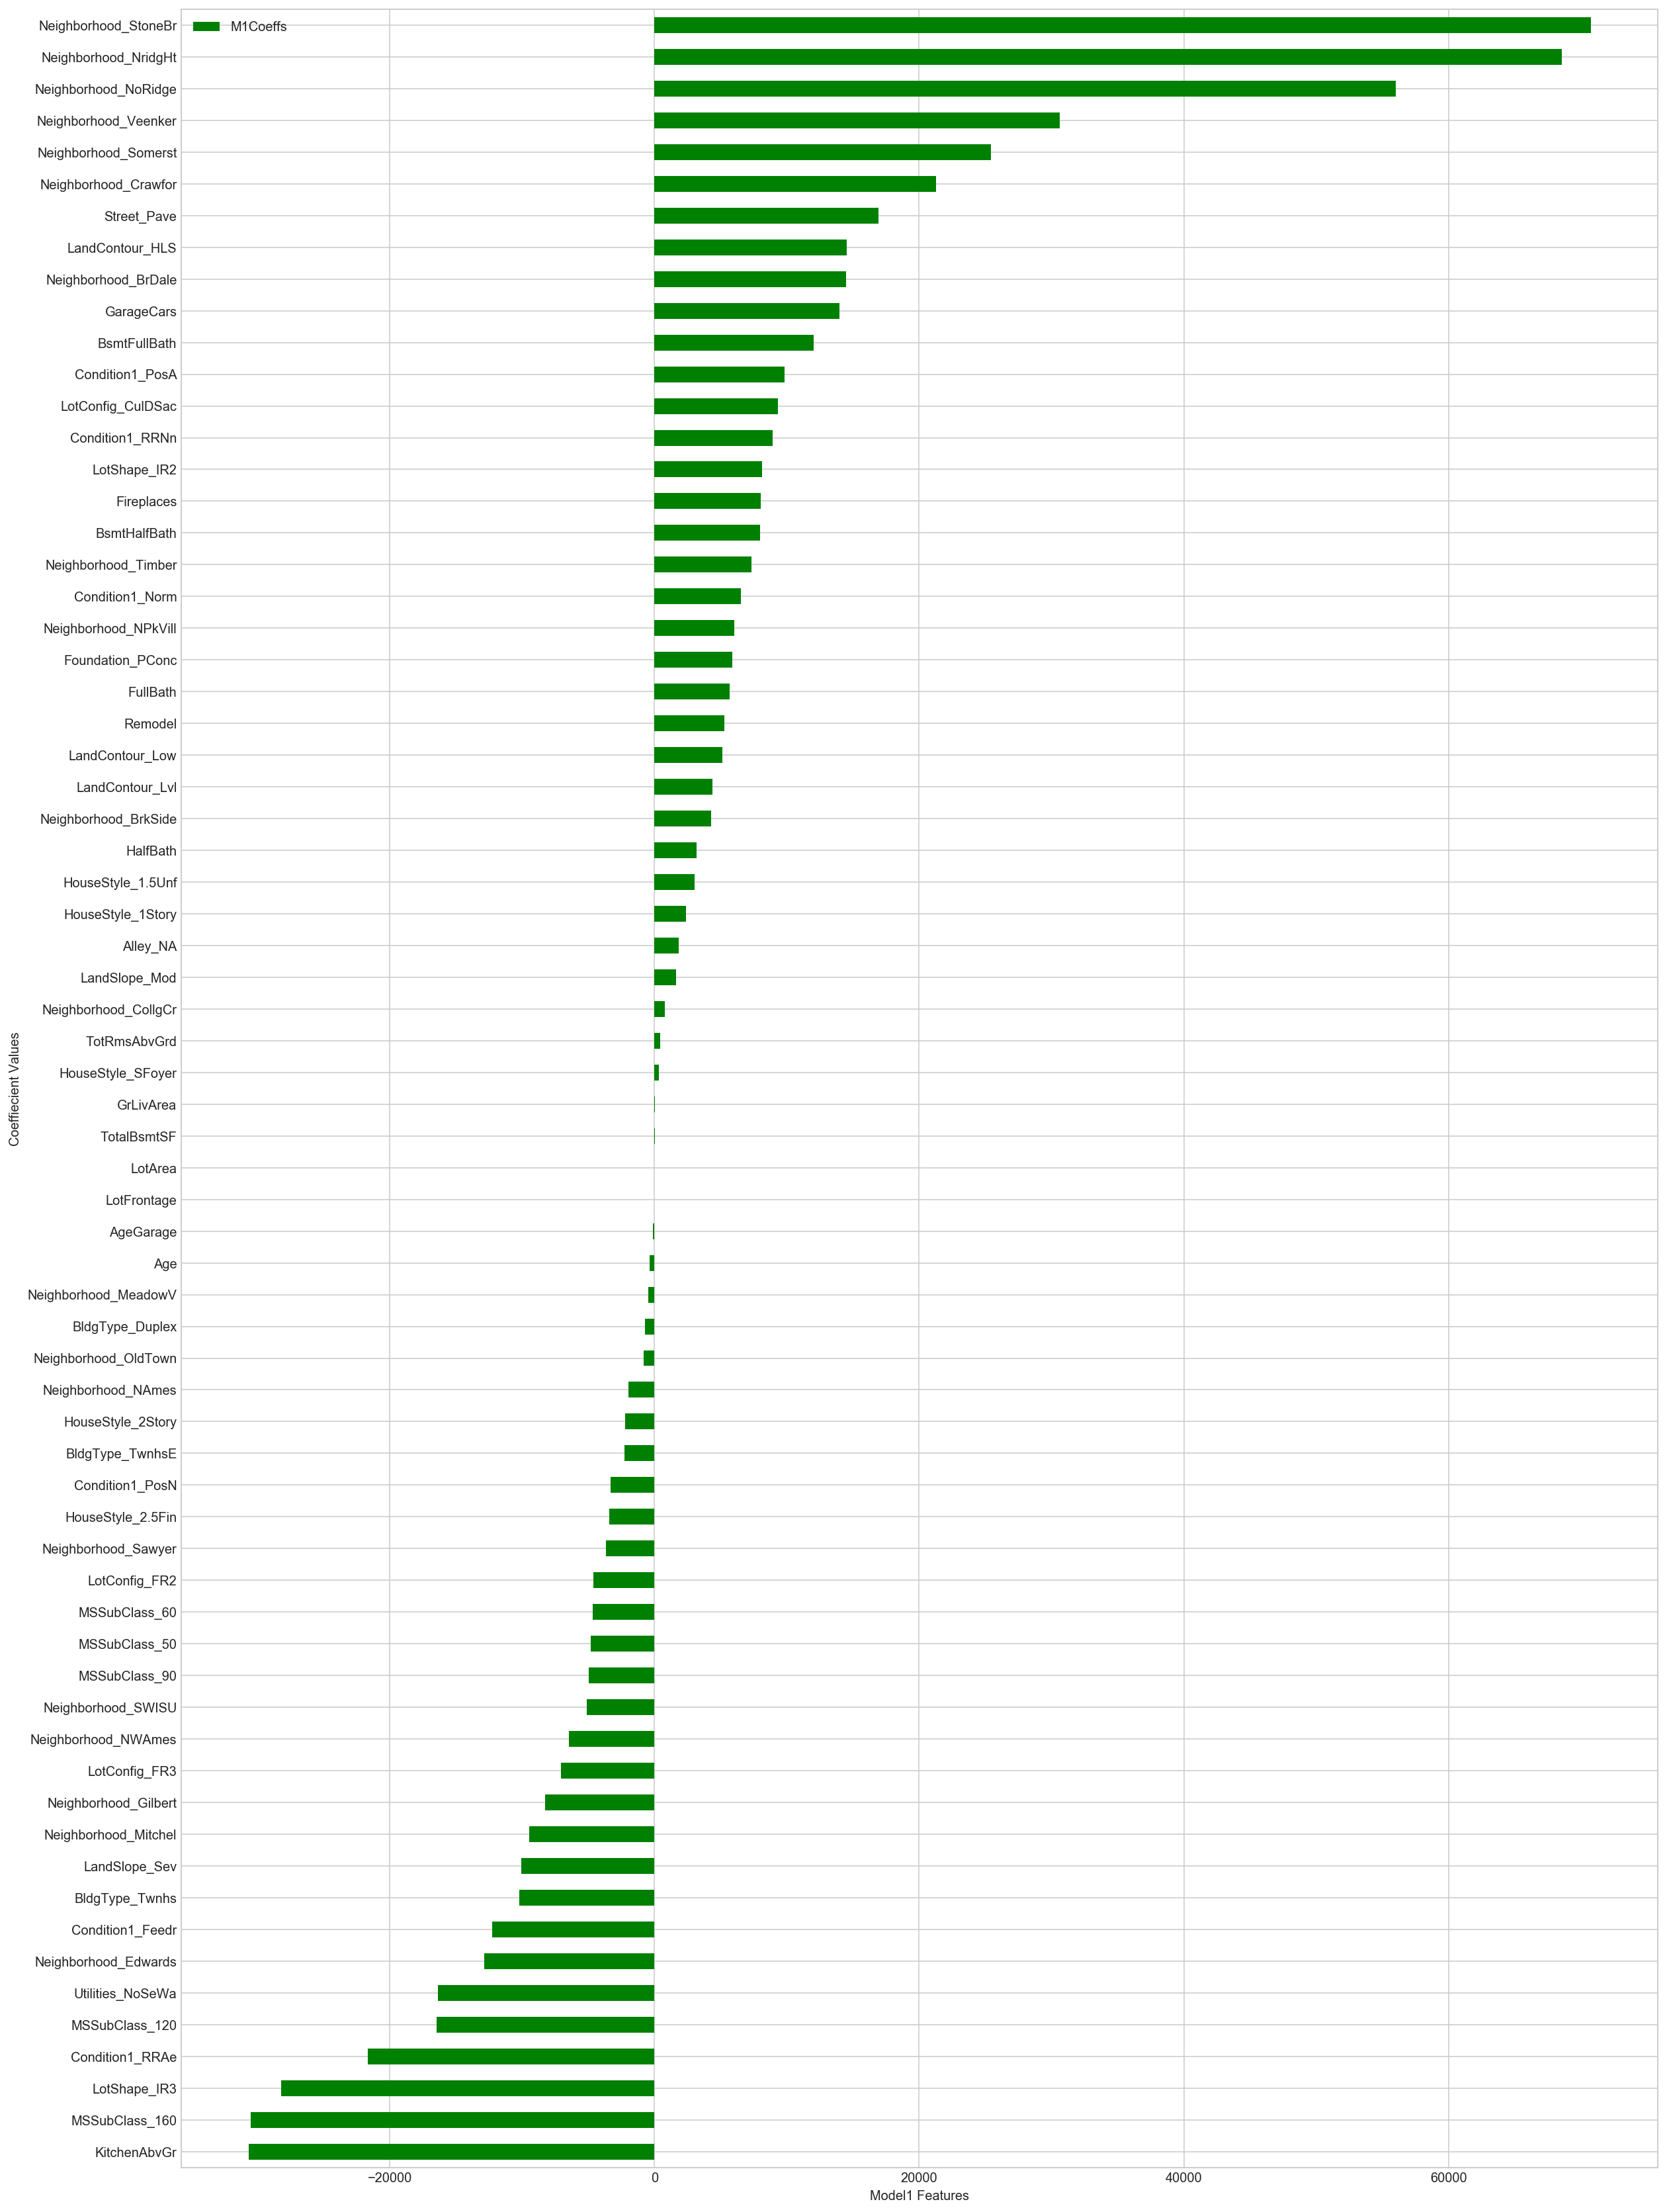

In [52]:
# Plot the coefficients to see which features contribute positively and negatively
model1_coefs_df = model1_coefs_df.sort_values(by='M1Coeffs', ascending=True)
model1_coefs_df[model1_coefs_df['M1Coeffs'] != 0].plot(kind='barh', figsize=(20,30), color='g')

ax = plt.gca()
ax.set_xlabel('Model1 Features')
ax.set_ylabel('Coeffiecient Values')
ax.legend()

# III. Interpretation

- In terms of models, Lasso has better prediction compared to using OLS with pvalue elimination
- Neighbourhood has the highest impact in pushing the price up in terms of fixed features
- Irregular Lot shapes, 2-STORY PUD - 1946 & NEWER and Kitchens above ground have the highest impact in pushing 
  the price down. Irregular lot shapes are not so easy to renovate in terms of design and appeal will be less. For
  kitchens above the ground, I think it makes sense that people will prefer the space above ground to be used more for
  rooms as it will give them more privacy

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

# I. MODEL 1.3 - Feature Elimination using Lasso

In [53]:
#Set-up Predictor and Target Matrices
cols = list(df_house_m2.columns.values)
cols.remove('SalePrice')
cols.remove('SaleCondition')
cols.remove('YrSold')

In [54]:
# Split the Train and Test data by Year Sold
X_Train = df_house_m2[df_house_m2['YrSold'] != 2010][cols]
y_Train = df_house_m2[df_house_m2['YrSold'] != 2010]['SalePrice'].values

X_Test = df_house_m2[df_house_m2['YrSold'] == 2010][cols]
y_Test = df_house_m2[df_house_m2['YrSold'] == 2010]['SalePrice'].values

In [55]:
# Generate alphas
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0,0.5,'weights')

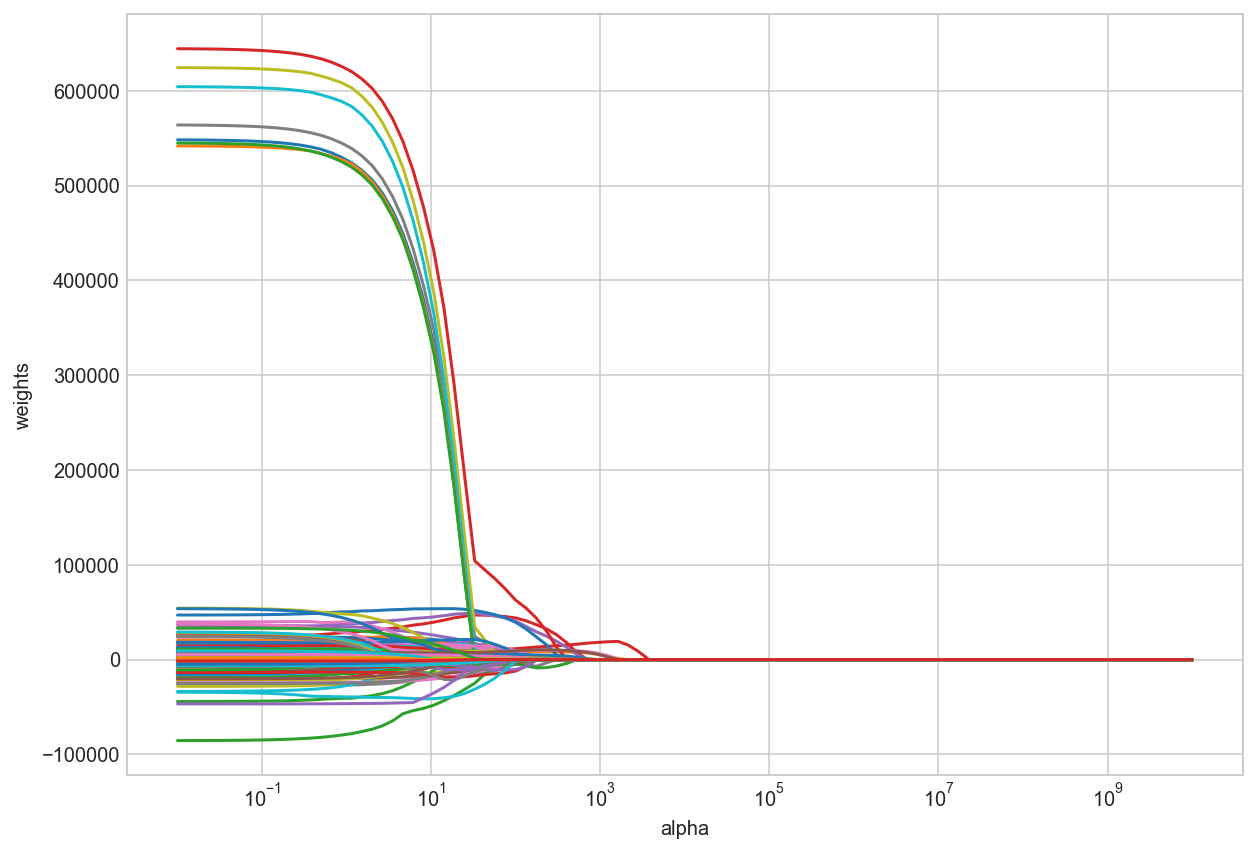

In [56]:
#Do Feature Selection using Lasso
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
lasso = Lasso(max_iter = 100000, normalize = True, fit_intercept=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_Train, y_Train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,7))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [57]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True, fit_intercept=True)
lassocv.fit(X_Train, y_Train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_Train, y_Train)
mean_squared_error(y_Train, lasso.predict(X_Train))

790769687.4330528

In [58]:
lasso.score(X_Train, y_Train), lasso.score(X_Test, y_Test)

(0.8735002641969805, 0.8688889993554569)

In [59]:
# Some of the coefficients are now reduced to exactly zero.
model2_coefs_df = pd.DataFrame(data=lasso.coef_, index=cols, columns=['M2Coeffs'])

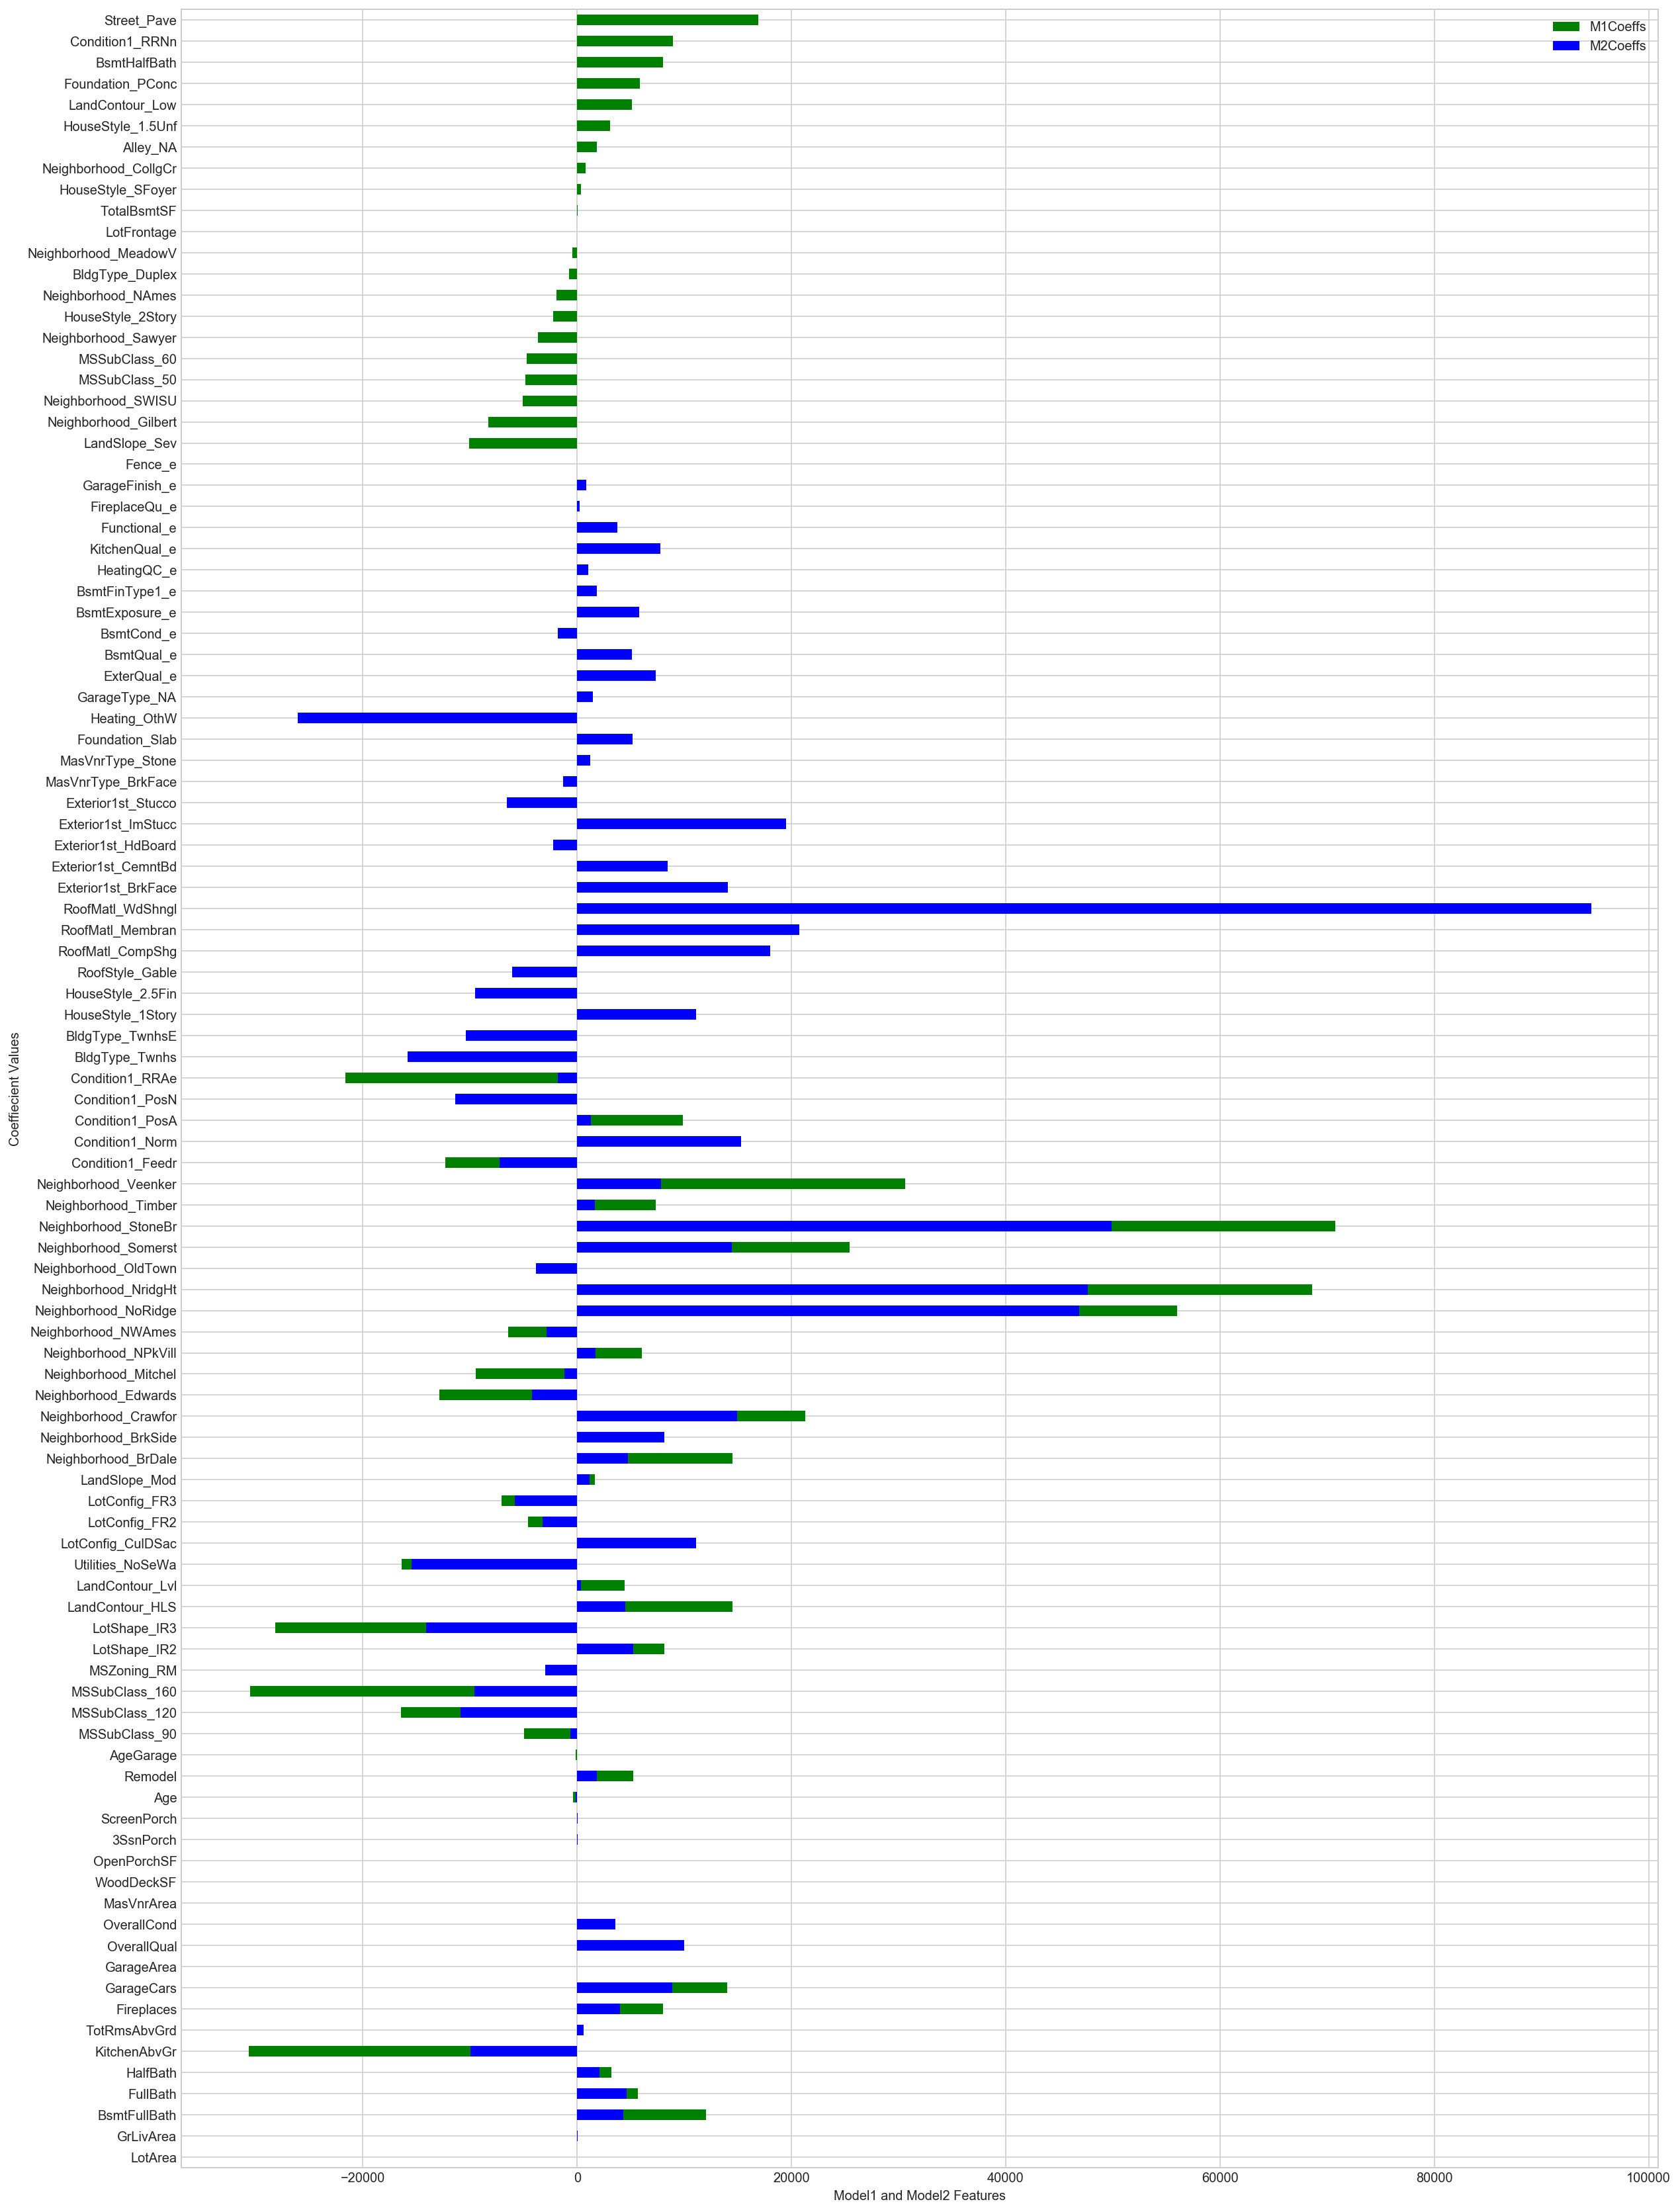

In [60]:
# Combine both Lasso Features from Model 1 and 2 and remove the 0 values
model1_coefs_df = model1_coefs_df[model1_coefs_df['M1Coeffs'] != 0]
model2_coefs_df = model2_coefs_df[model2_coefs_df['M2Coeffs'] != 0]
modelc_coefs_df = pd.concat([model2_coefs_df, model1_coefs_df], axis=1, sort=False)

# Plot the coefficients to see which features contribute positively and negatively
modelc_coefs_df['M1Coeffs'].plot(kind='barh', figsize=(20,30), color='g')
modelc_coefs_df['M2Coeffs'].plot(kind='barh', figsize=(20,30), color='b')

ax = plt.gca()
ax.set_xlabel('Model1 and Model2 Features')
ax.set_ylabel('Coeffiecient Values')
ax.legend()

In [61]:
from sklearn.model_selection import cross_val_score
scores_lsr = cross_val_score(lasso, X_Train, y_Train, cv=10,scoring='explained_variance')

In [62]:
print('Scores for k=10 fold validation:',scores_lsr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_lsr.mean(), scores_lsr.std() * 2))

Scores for k=10 fold validation: [0.90218355 0.90652132 0.87179057 0.76735587 0.86418748 0.86368259
 0.86120137 0.82326018 0.62837419 0.89200312]
Est. explained variance: 0.84 (+/- 0.16)


# II. MODEL 1.4 - Model for Variance

In [63]:
# Create a Model to predict the variance
y_Train_Var = y_Train - lasso.predict(X_Train)
y_Test_Var = y_Test - lasso.predict(X_Test)

Text(0,0.5,'weights')

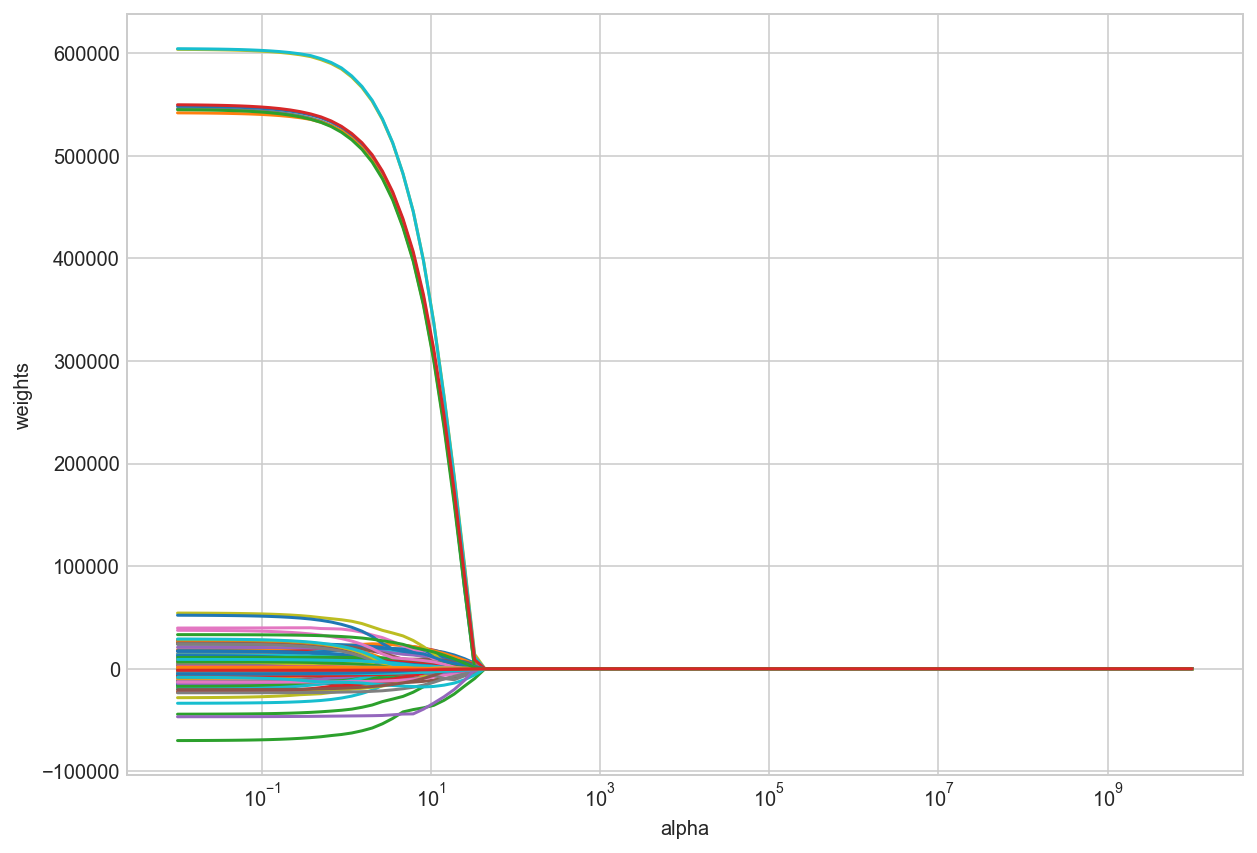

In [64]:
lasso = Lasso(max_iter = 100000, normalize = True, fit_intercept=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_Train, y_Train_Var)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,7))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [65]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True, fit_intercept=True)
lassocv.fit(X_Train, y_Train_Var)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_Train, y_Train_Var)
mean_squared_error(y_Train_Var, lasso.predict(X_Train))

790769687.4330525

In [66]:
lasso.score(X_Train, y_Train_Var), lasso.score(X_Test, y_Test_Var)

(0.0, -0.0006172174655196816)

In [67]:
# Some of the coefficients are now reduced to exactly zero.
model22_coefs_df = pd.DataFrame(data=lasso.coef_, index=cols, columns=['M22Coeffs'])
model22_coefs_df[model22_coefs_df['M22Coeffs']!=0]

M22Coeffs
GarageCars  1.358956e-13

# III. Interpretation

- By using Lasso and including the non-fixed features, the new model is able to achieve better scores than the first
  one
- Features that were highly emphasized by the previous model were either eliminated or reduced by the new
  model (Neighbourhood, MSSubclass)
- The new model suggests that quality of the house pushes the price up (especially the exterior features)
- https://shakeguys.com/2013/08/pros-and-cons-of-cedar-roofing/
- The link above shows that wood shingles roofing are expensive but they are effective for different weathers and can
  last longer
- Unconventional forms of heating has the greatest impact of pushing the price down (I think heating is an important
  consideration for the home buyers)
- The model did not take into account the seasonality of the sales (year and month)
- Previous EDA did show that some months have higher price especially January and mid year

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       

# I. Create Model for SaleCondition = Abnorml using Undersampling + RF / XGBoost

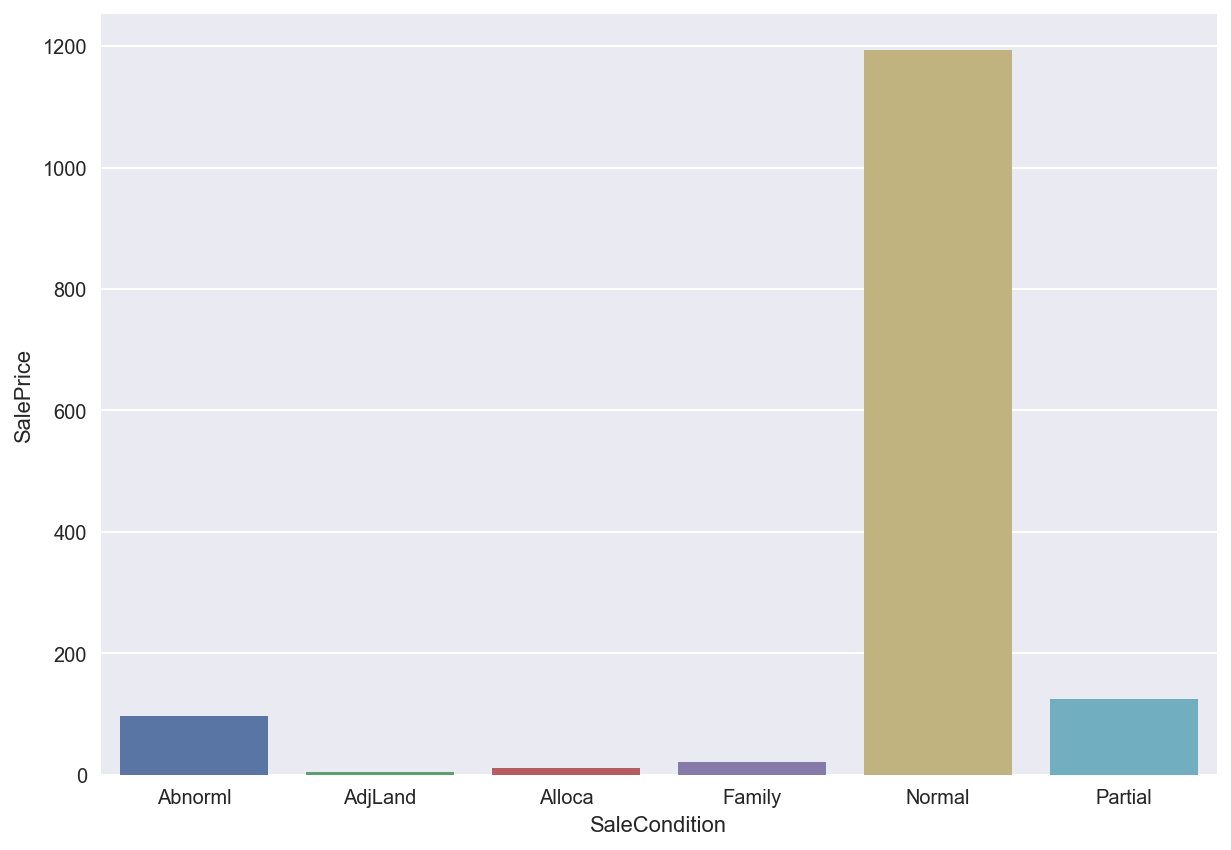

In [68]:
# Check the distribution of Housing Data based on Sale Condition
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data=df_house_res.groupby('SaleCondition').count()[['SalePrice']],
            y='SalePrice', x=df_house_res.groupby('SaleCondition').count()[['SalePrice']].index.T)

In [69]:
# Create a copy of the 2nd dataframe to be used for 3rd model
df_house_m3 = df_house_m2.copy()

In [70]:
# Convert SaleCondition into dummy variables
df_house_m3 = pd.get_dummies(df_house_m3, columns=['SaleCondition'], drop_first=False)
df_house_m3[[column for column in df_house_m3.columns.tolist() if 'SaleCondition' in column]].sample(5)

SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
118                      0                      0                     0   
14                       0                      0                     0   
765                      0                      0                     0   
731                      0                      0                     0   
124                      0                      0                     0   

     SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
118                     0                     1                      0  
14                      0                     1                      0  
765                     0                     0                      1  
731                     0                     1                      0  
124                     0                     1                      0

In [71]:
# Set-up Predictor and Target Matrices
cols = list(df_house_m3.columns.values)
cols.remove('SalePrice')
cols.remove('SaleCondition_Abnorml')
cols.remove('SaleCondition_AdjLand')
cols.remove('SaleCondition_Alloca')
cols.remove('SaleCondition_Family')
cols.remove('SaleCondition_Normal')
cols.remove('SaleCondition_Partial')
cols.remove('YrSold')

X = df_house_m3[cols]
y = df_house_m3['SaleCondition_Abnorml'].values

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


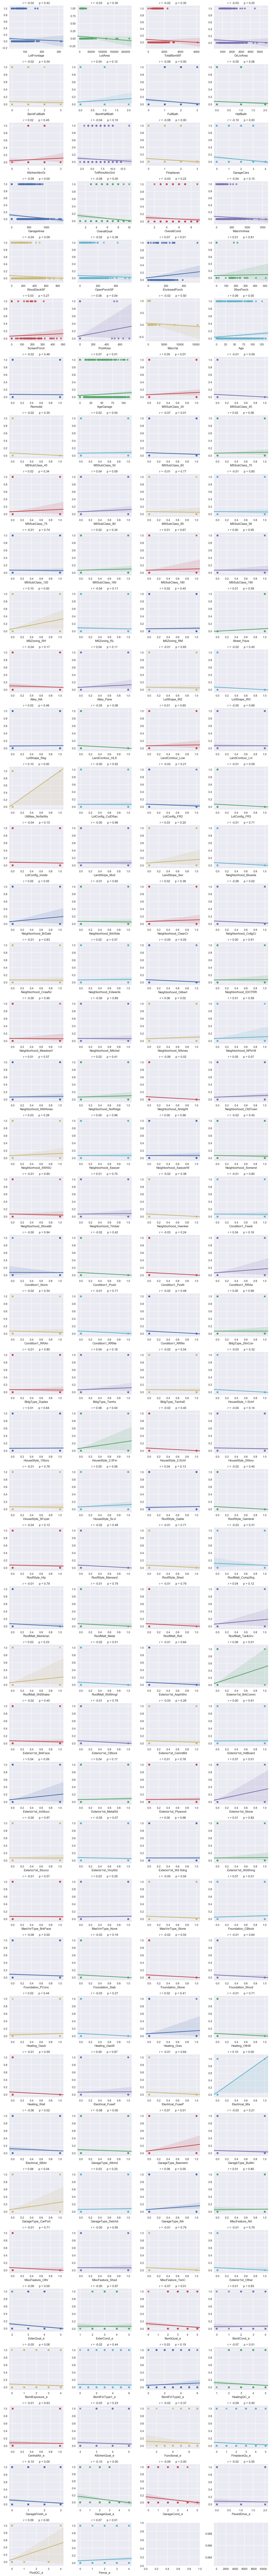

In [72]:
# Plot the correlations and p of numerical values vs Sale Condition Abnormal
nr_rows = 44
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_plot_num_feats = X.columns.T

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(X[li_plot_num_feats[i]], y, ax = axs[r][c])
            stp = stats.pearsonr(X[li_plot_num_feats[i]], y)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

Observations for distribution SaleCondition = Abnorml in correlation with other features:
- LotArea <= 50000
- BsmtFullBath <= 2
- BsmtHalfBath <= 1
- HalfBath <= 1
- Fireplaces <= 2
- GarageCars <= 3
- GarageArea <= 1000
- OverallQual >= 2
- MasVnrArea <= 1000
- WoodDeckSF <= 600
- 3SsnPorch <= 300
- MiscVal <= 5000
- MSSubClass_40 == 0
- MSSubClass_45 == 0
- Street_Pave == 1
- LotShape_IR3 == 0
- LandContour_HLS == 0
- LotConfig_FR3 == 0
- Neighborhood_Blueste == 0
- Neighborhood_NridgHt == 0
- Neighborhood_Veenker == 0
- Condition1_PosA == 0
- Condition1_PosN == 0
- Condition1_RRNe == 0
- Condition1_RRNn == 0
- HouseStyle_1.5Unf == 0
- HouseStyle_2.5Unf == 0
- RoofStyle_Gambrel == 0
- RoofStyle_Mansard == 0
- RoofStyle_Shed == 0
- RoofStyle_Membran == 0
- RoofStyle_Metal == 0
- RoofStyle_Roll == 0
- RoofMatl_WoodShngl == 0
- Exterior1st_AspShn == 0
- Exterior1st_CBlock == 0
- Foundation_Slab == 0
- Foundation_Stone == 0
- Foundation_Wood == 0
- Heating_GasW == 0
- Heating_OthW == 0
- Heating_Wall == 0
- Electrical_FuseP == 0
- MiscFeature_Othr == 0
- MiscFeature_TenC == 0
- Exterior1st_Other == 0
- ExterQual_e <= 4

In [73]:
# Apply the filters based on the observations noted previously in order to boost the ratio of abnormal sales
# by Undersampling
df_house_m3_fil = df_house_m3[df_house_m3['LotArea'] <= 50000]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['BsmtFullBath'] <= 2]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['BsmtHalfBath'] <= 1]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['HalfBath'] <= 1]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Fireplaces'] <= 2]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['GarageCars'] <= 3]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['GarageArea'] <= 1000]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['OverallQual'] >= 2]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['MasVnrArea'] <= 1000]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['WoodDeckSF'] <= 600]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['3SsnPorch'] <= 300]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['MiscVal'] <= 5000]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['MSSubClass_40'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['MSSubClass_45'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Street_Pave'] == 1]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['LotShape_IR3'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['LandContour_HLS'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['LotConfig_FR3'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Neighborhood_Blueste'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Neighborhood_NridgHt'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Neighborhood_Veenker'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Condition1_PosA'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Condition1_PosN'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Condition1_RRNe'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Condition1_RRNn'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['HouseStyle_1.5Unf'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['HouseStyle_2.5Unf'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofStyle_Gambrel'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofStyle_Mansard'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofStyle_Shed'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofMatl_Membran'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofMatl_Metal'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofMatl_Roll'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['RoofMatl_WdShngl'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Exterior1st_AsphShn'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Exterior1st_CBlock'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Foundation_Slab'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Foundation_Stone'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Foundation_Wood'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Heating_GasW'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Heating_OthW'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Heating_Wall'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Electrical_FuseP'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['MiscFeature_Othr'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['MiscFeature_TenC'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['Exterior1st_Other'] == 0]
df_house_m3_fil = df_house_m3_fil[df_house_m3_fil['ExterQual_e'] <= 4]
df_house_m3_fil.shape

(1115, 182)

In [74]:
# Update X and y
X = df_house_m3_fil[cols]
y = df_house_m3_fil['SaleCondition_Abnorml'].values

In [75]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [76]:
# Check the distribution of abnormal in train and test
len(X_Train), sum(y_Train), len(X_Test), sum(y_Test)

(892, 80, 223, 16)

In [77]:
# Change the X values into DataFrame format
X_Train = pd.DataFrame(data=X_Train, columns=cols)
X_Test = pd.DataFrame(data=X_Test, columns=cols)

In [78]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [79]:
clf = RandomForestClassifier()
clf.fit(X_Train, y_Train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
model3_fi_df = pd.DataFrame(data=clf.feature_importances_, index=X_Train.columns.T, columns=['FI3'])

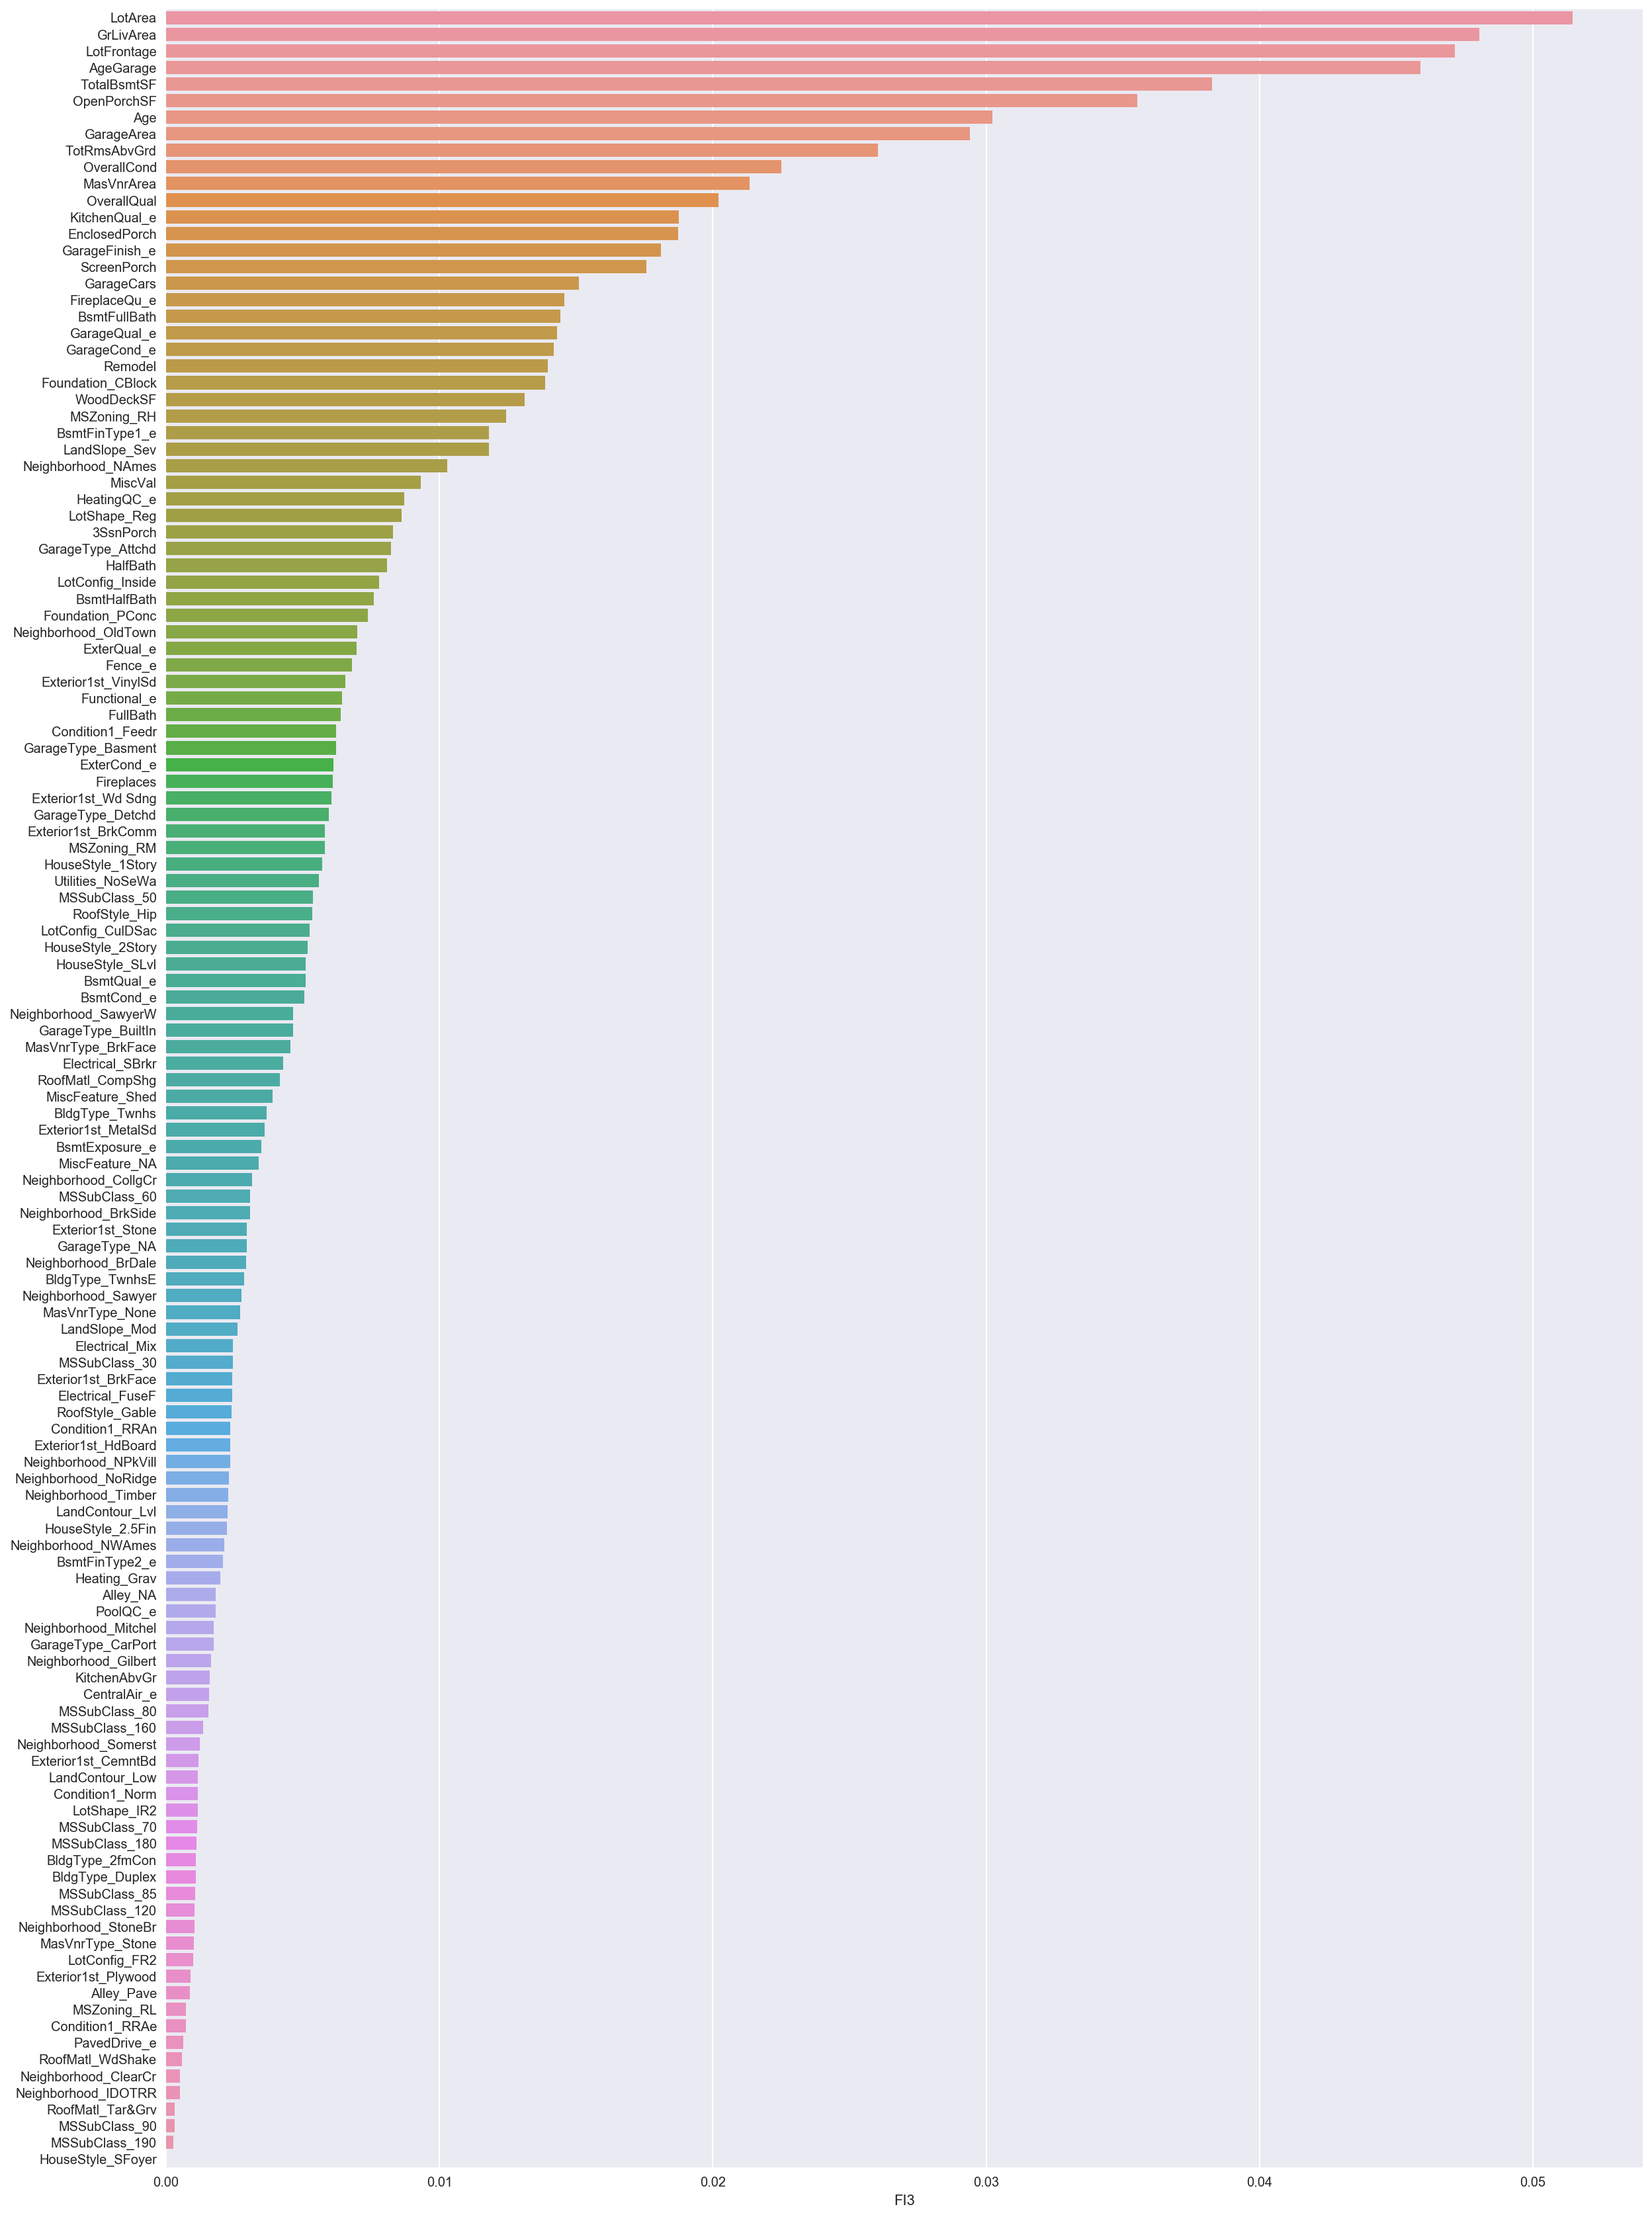

In [81]:
# Plot the Features sorted by decreasing importance
sns.set(rc={'figure.figsize':(20,30)})
sns.barplot(y=model3_fi_df[model3_fi_df['FI3'] > 0].sort_values(by='FI3', ascending=False).index, 
            x=model3_fi_df[model3_fi_df['FI3'] > 0].sort_values(by='FI3', ascending=False)['FI3'])

In [82]:
y_Pred = clf.predict(X_Test)
predictions = [round(value) for value in y_Pred]

print("Accuracy: %.2f%%" % (clf.score(X_Test, y_Pred) * 100.0))

Accuracy: 100.00%


In [83]:
metrics.classification_report(y_Test, predictions)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96       207\n           1       0.00      0.00      0.00        16\n\n   micro avg       0.93      0.93      0.93       223\n   macro avg       0.46      0.50      0.48       223\nweighted avg       0.86      0.93      0.89       223\n'

In [84]:
metrics.confusion_matrix(y_Test, y_Pred)

array([[207,   0],
       [ 16,   0]])

In [85]:
# Use XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=10, n_estimators=300, learning_rate=0.05).fit(X_Train, y_Train)

In [86]:
y_Pred = xgb_model.predict(X_Test)
predictions = [round(value) for value in y_Pred]

print("Accuracy: %.2f%%" % (xgb_model.score(X_Test, y_Pred) * 100.0))

Accuracy: 100.00%


In [87]:
metrics.classification_report(y_Test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97       207\n           1       1.00      0.06      0.12        16\n\n   micro avg       0.93      0.93      0.93       223\n   macro avg       0.97      0.53      0.54       223\nweighted avg       0.94      0.93      0.90       223\n'

In [88]:
metrics.confusion_matrix(y_Test, predictions)

array([[207,   0],
       [ 15,   1]])

# II. Create Model for SaleCondition = Abnorml using Undersampling + SMOTE + RF

In [89]:
# Use SMOTE first and do Random Forest
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_Res, y_Res = sm.fit_sample(X, y)

In [90]:
X_Train_Res, X_Test_Res, y_Train_Res, y_Test_res = train_test_split(X_Res,y_Res,test_size = .2,random_state=12)

In [91]:
# Change the X values into DataFrame format
X_Train_Res = pd.DataFrame(data=X_Train_Res, columns=cols)
X_Test_Res = pd.DataFrame(data=X_Test_Res, columns=cols)

In [92]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_Train_Res, y_Train_Res)
print("Accuracy: %.2f%%" % (clf_rf.score(X_Test_Res, y_Test_res) * 100.0))

Accuracy: 93.63%


In [93]:
y_Pred_Res = clf_rf.predict(X_Test_Res)
predictions_Res = [round(value) for value in y_Pred_Res]

In [94]:
metrics.classification_report(y_Test_res, predictions_Res)

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94       210\n           1       0.97      0.90      0.93       198\n\n   micro avg       0.94      0.94      0.94       408\n   macro avg       0.94      0.94      0.94       408\nweighted avg       0.94      0.94      0.94       408\n'

In [95]:
metrics.confusion_matrix(y_Test_res, predictions_Res)

array([[204,   6],
       [ 20, 178]])

In [96]:
model4_fi_df = pd.DataFrame(data=clf_rf.feature_importances_, index=X_Train_Res.columns.T, columns=['FI4'])

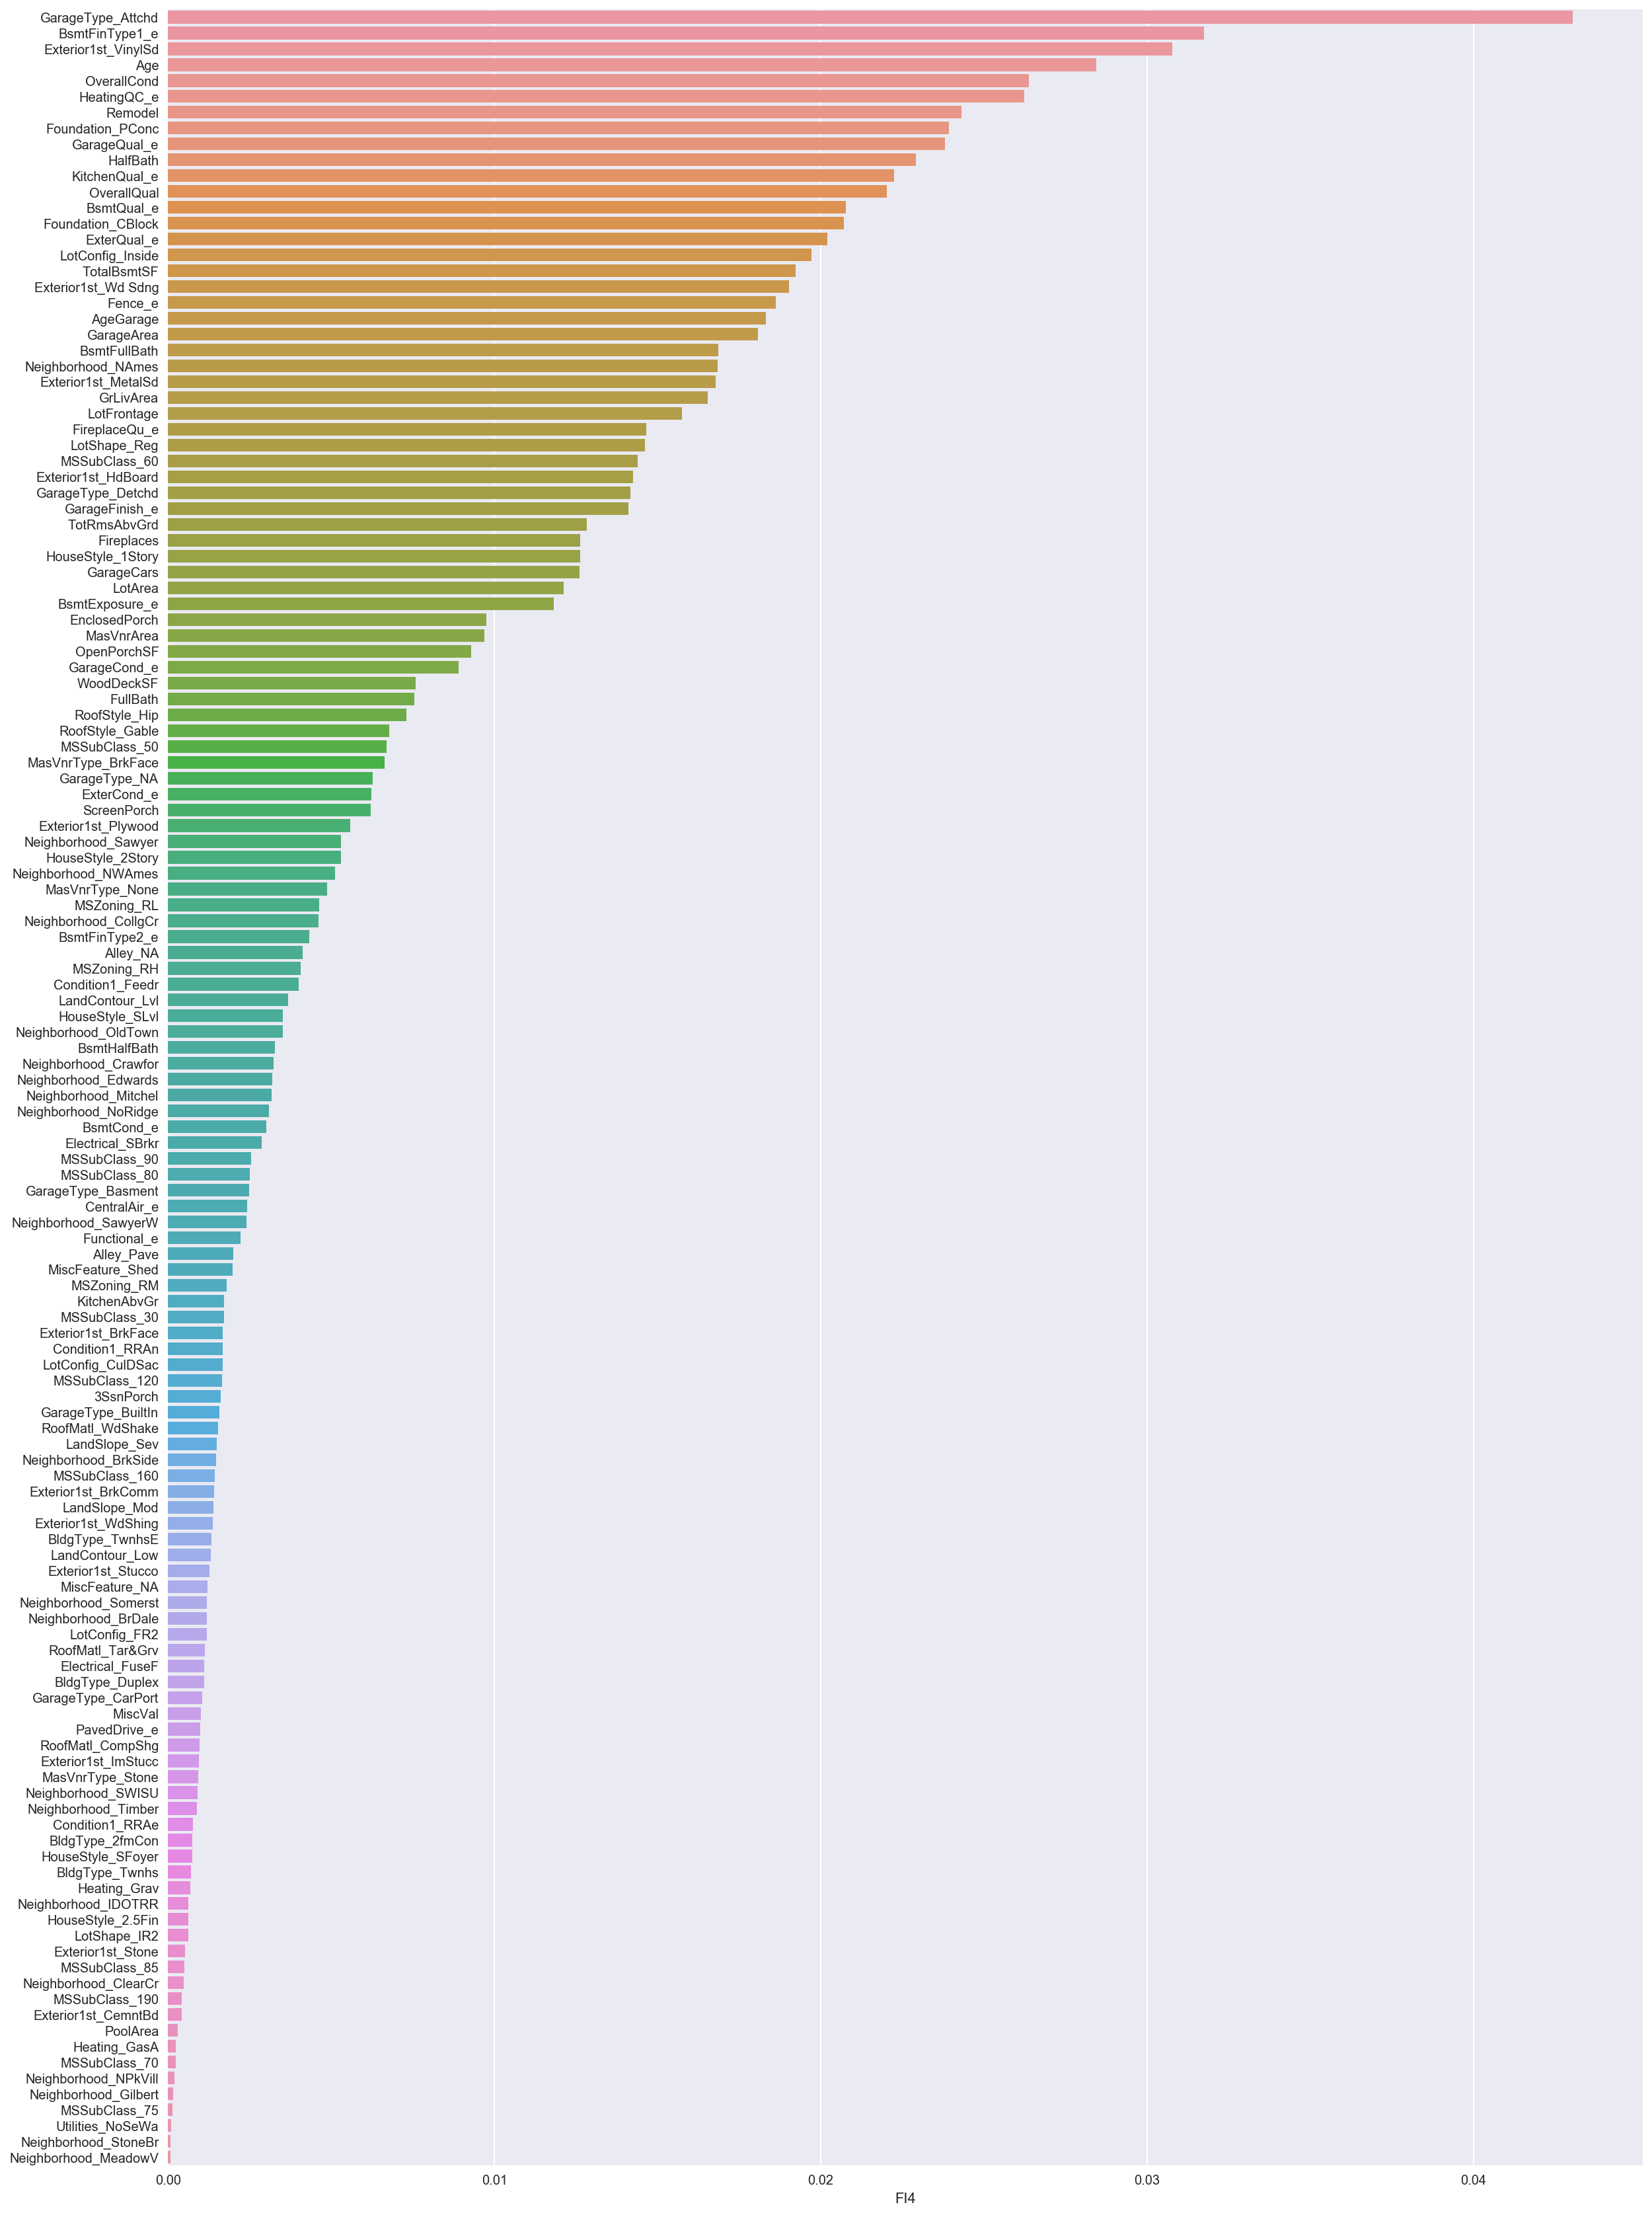

In [97]:
# Plot the Features sorted by decreasing importance
sns.set(rc={'figure.figsize':(20,30)})
sns.barplot(y=model4_fi_df[model4_fi_df['FI4'] > 0].sort_values(by='FI4', ascending=False).index, 
            x=model4_fi_df[model4_fi_df['FI4'] > 0].sort_values(by='FI4', ascending=False)['FI4'])

# III. Interpretation

- Features which are general premium indicators (Condition, Quality and Finishing) seems to be the best way to predict   whether the record is an abnormal sale
- The 1st Model is not useful as it is unable to predict any TN (see the results) except for XGBoost
- The 2nd Model is better at it is able to predict both TP and TN
- Since the data points for Abnormal Sale is only around 7% of the entire sample, the predictions of Model 2 is far    from conclusive as there is not sufficient data to predict new target data in the future